# NSE TIME SERIES ANALYSIS

Group Members.
1. Brenda Mutai - Group Lead
2. Justin Mbugua
3. Sharon Momanyi
4. Stephen Munyiala

# Project Summary.
This project focuses on analyzing stock price movements across all publicly listed companies on the Nairobi Securities Exchange (NSE) over the years 2013 to 2024.

Using daily trading data — including prices, trading volume, Sector information — the project aims to provide actionable insights into market trends, stock performance, sector dynamics, and trading patterns.

The analysis aims to help investors, analysts, and researchers better understand market behavior and identify opportunities within the Kenyan stock market.

# Business Understanding
Investors and financial institutions operating on the Nairobi Securities Exchange (NSE) rely on precise information to make strategic decisions regarding stock trades. By forecasting future stock prices and identifying market trends, they can optimize investment strategies, improve portfolio management, and effectively mitigate risks. Such insights empower traders to seize profitable opportunities, avoid potential losses, and enhance overall financial stability.  
  
Additionally, predictive models enable investors to understand market behavior better, adapt to changing conditions, and maintain a competitive edge. With tools for analyzing historical trading data, stakeholders can uncover patterns, assess the impact of external factors like economic policies or global market shifts, and make data-driven choices that align with their financial goals. These advancements are essential for thriving in a dynamic stock market environment like the NSE.
#### Challenges faced today:
- Manual analysis of stock patterns is time-consuming.
- Investors react to market events after they occur, not proactively.
- Lack of predictive models tuned specifically for NSE stock behaviors (which may differ from US/EU markets).



## Objectives
Mainly to Develop time series models to forecast future stock prices.

1. To provide insights into which stocks might perform well based on historical trends and predictive models, which will allow for more informed decision-making.

2. To offer short-term predictions of stock prices or trends to support timely buy/sell decisions, potentially improving their profitability.

3. To develop a machine learning-based tool that provides predictive insights and visualizations for NSE market trends.

## Stakeholders
1. Individual Investors: People who are actively trading or considering investments in NSE-listed companies.

2. Institutional Investors: Investment funds, banks, and pension funds looking for more structured insights into the market.

3. Stockbrokers and Analysts: Professionals who rely on historical data to guide their clients and make informed decisions.

4. NSE and Regulatory Bodies: The NSE itself and regulatory authorities that track market health and performance, using tools for market surveillance and risk assessment.

5. Financial Advisors: Professionals who can use predictive insights to guide client portfolios.

## Data Understanding.
The data is a compilation of historical daily stock market price data relates to the Kenyan Nairobi Securities Exchange (NSE) for 2013 and 2024. It was sourced from https://data.mendeley.com/(Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2013-2024)

The data was scrapped from a publicly accessible website (http://live.mystocks.co.ke/) licensed by NSE by exporting raw web data to spreadsheets, then cleaned  up to a final CSV.

Each stock data row has 13 data columns (1)Date (2)Stock Code (3)Stock Name (4)12-month Low price (5)12-month High price (6)Day's Low price (7)Day's High price (8)Day's Final Price (9)Previous traded price (10)Change in price value (11)Change in price % (12)Volume traded (13)Adjusted price.  One additional CSV file is also provided to show the stocks market sector, with 3 columns as: (1)Market sector (2)Stock Code (3)Stock Name.

## Metric of success.
1. Model Performance: Accuracy of stock price forecasts measured by metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), or R-squared.
2. Insight Utility: The relevance and actionability of the identified market trends, sector performance analyses, and trading patterns for stakeholder decision-making (Qualitative).
3. Completeness: Successful analysis covering the specified timeframe (2013-2024) and scope (all listed companies, key data points).

## 1. Dataset loading.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import xgboost as xgb
import joblib
import os


In [2]:
# Loading the data
data_2013 = pd.read_csv('NSE_data_all_stocks_2013.csv')
data_2014 = pd.read_csv('NSE_data_all_stocks_2014.csv')
data_2015 = pd.read_csv('NSE_data_all_stocks_2015.csv')
data_2016 = pd.read_csv('NSE_data_all_stocks_2016.csv')
data_2017 = pd.read_csv('NSE_data_all_stocks_2017.csv')
data_2018 = pd.read_csv('NSE_data_all_stocks_2018.csv')
data_2019 = pd.read_csv('NSE_data_all_stocks_2019.csv')
data_2020 = pd.read_csv('NSE_data_all_stocks_2020.csv')
data_2021 = pd.read_csv('NSE_data_all_stocks_2021.csv')
data_2022 = pd.read_csv('NSE_data_all_stocks_2022.csv')
data_2023 = pd.read_csv('NSE_data_all_stocks_2023.csv')
data_2024 = pd.read_csv('NSE_data_all_stocks_2024.csv')

In [3]:
sectors = pd.read_csv('NSE_data_stock_market_sectors_2023_2024.csv')

In [4]:
all_df = [data_2013, data_2014, data_2015, data_2016, data_2017, data_2018,
           data_2019, data_2020, data_2021, data_2022, data_2023, data_2024]

Since the dataset have been loaded, they have the same features just different names. So we worked on making them have similarity for easy merging and use in the project.

In [5]:
for i in range(len(all_df)):
    all_df[i].columns = all_df[i].columns.str.strip()
    all_df[i].rename(columns = {'DATE': 'Date', 'CODE': 'Code', 'NAME': 'Name', 'Adjust': 'Adjusted Price'}, inplace = True)

In [6]:
data_2013

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,-,-,-,-
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,-
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,-,-,-,59
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,-,-,-,215
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14884,31-Dec-13,SCOM,Safaricom Plc,23.5,33.5,10.8,10.95,10.85,10.85,-,-,"2,461,000",-
14885,31-Dec-13,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,172.4,172.4,172.4,172.84,-0.44,0.25%,-,-
14886,31-Dec-13,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,174.27,174.27,174.27,174.56,-0.29,0.17%,-,-
14887,31-Dec-13,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","4,926.97","4,926.97","4,926.97","4,874.29",52.68,1.08%,-,-


In [7]:
# Merging the data files
nse_data = pd.concat([data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019,
                       data_2020, data_2021, data_2022, data_2023, data_2024], ignore_index = True)

In [8]:
nse_data = nse_data.merge(sectors, left_on = 'Code', right_on = 'Stock_code', how = 'left')
nse_data.drop(columns = ['Stock_code','Stock_name'], axis = 1, inplace = True)

Since all the NSE data and the respective sectors is loaded in different data frames, we need to merge it into a single dataframe.

In [9]:
nse_data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,-,-,-,-,Agricultural
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,-,Agricultural
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,-,-,-,59,Agricultural
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,-,-,-,215,Agricultural
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",-,Agricultural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204382,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-,Indices
204383,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-,Indices
204384,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-,NaN
204385,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-,Indices


## 2. Data Cleaning.

The data appears to have several missing values. Next we check for the dataframe information to find out how many missing values are in each column. This is important when deciding how we'll deal with the missing values.

In [10]:
nse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204387 entries, 0 to 204386
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            204385 non-null  object
 1   Code            204385 non-null  object
 2   Name            204385 non-null  object
 3   12m Low         204385 non-null  object
 4   12m High        204385 non-null  object
 5   Day Low         204385 non-null  object
 6   Day High        204385 non-null  object
 7   Day Price       204385 non-null  object
 8   Previous        204385 non-null  object
 9   Change          204385 non-null  object
 10  Change%         204385 non-null  object
 11  Volume          204385 non-null  object
 12  Adjusted Price  204385 non-null  object
 13  Sector          196499 non-null  object
dtypes: object(14)
memory usage: 21.8+ MB


In [11]:
# Checking for null values
nse_data.isnull().sum()

Date                 2
Code                 2
Name                 2
12m Low              2
12m High             2
Day Low              2
Day High             2
Day Price            2
Previous             2
Change               2
Change%              2
Volume               2
Adjusted Price       2
Sector            7888
dtype: int64

The empty values are not interpreted as missing values because they are currently represented as '-'. We'll first have to change this to NaN to see how many values are missing.

In [12]:
# Replace '-' with NaN
nse_data.replace('-', pd.NA, inplace = True)
nse_data.isnull().sum()

Date                   2
Code                   2
Name                   2
12m Low                2
12m High               2
Day Low               35
Day High              35
Day Price              3
Previous               7
Change             76427
Change%            76507
Volume             61826
Adjusted Price    187374
Sector              7888
dtype: int64

To prepare the numeric columns for analysis, we first need to clean them by removing any commas and spaces before converting them to numeric.

In [13]:
# Columns to exclude from numeric cleaning
exclude_cols = ['Code', 'Name', 'Sector', 'Date', 'Change%']

# Clean all other columns
for col in nse_data.columns:
    if nse_data[col].dtype == 'object' and col not in exclude_cols:
        nse_data[col] = nse_data[col].str.replace(',', '')
        nse_data[col] = pd.to_numeric(nse_data[col], errors = 'coerce')

# Remove the '%' sign and convert Change% to numeric
nse_data['Change%'] = nse_data['Change%'].str.replace('%', '', regex = False)
nse_data['Change%'] = pd.to_numeric(nse_data['Change%'], errors = 'coerce')

In [14]:
# Convert numeric columns
num_cols = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Volume', 'Change']
nse_data[num_cols] = nse_data[num_cols].apply(pd.to_numeric, errors = 'coerce')

In [15]:
# Rechecking for null values
nse_data.isnull().sum()

Date                   2
Code                   2
Name                   2
12m Low                2
12m High               2
Day Low               35
Day High              35
Day Price              3
Previous               7
Change             76427
Change%            76507
Volume             61826
Adjusted Price    187374
Sector              7888
dtype: int64

Now the missing values are correctly interpreted and the columns with numeric values have been successfully. We also have to change the date from string format to datetime. Since the dates in the dataset has the day first while the dates in other datasets has the month first, we'll use a function that accounts for this.

In [16]:
# Converting to datetime
def safe_parse_date(date_str):
    try:
        if '2023' in date_str:
            return pd.to_datetime(date_str, dayfirst = True)
        else:
            return pd.to_datetime(date_str, dayfirst = False)
        # else:
        #     return pd.to_datetime(date_str, dayfirst = True)
    except:
        return pd.NaT

# Apply the function
nse_data['Date'] = nse_data['Date'].apply(safe_parse_date)

In [17]:
# Recheck missing values
nse_data.isnull().sum()

Date                   2
Code                   2
Name                   2
12m Low                2
12m High               2
Day Low               35
Day High              35
Day Price              3
Previous               7
Change             76427
Change%            76507
Volume             61826
Adjusted Price    187374
Sector              7888
dtype: int64

In [18]:
nse_data[nse_data['Day Price'].isnull()]

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
30584,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98402,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112988,2019-10-16,MSC,Mumias Sugar Company Ltd,0.27,0.39,NaN,NaN,NaN,0.28,0.28,NaN,5400.0,NaN,Manufacturing and Allied


All values in the 'Date' column have been successfully converted to datetime format. Now we can deal with missing values. We'll do this by:
- Dropping the **Adjusted Price** column.
- Replacing the missing values in the **Sector** column with 'Unknown'.
- Dropping missing values from the columns with a small number of missing values.
- Filling the missing values in the **Change** and **Change%** columns by calculating the values.
- Replacing the missing values in the **Volume** column with the median for each stock.

In [19]:
# Drop adjusted price column
nse_data.drop('Adjusted Price', axis = 1, inplace = True)

nse_data = nse_data[~nse_data['Sector'].isna()]

# Dropping rows with missing values from the 'Previous' column
nse_data = nse_data.dropna(subset = ['Date', 'Code', 'Name', '12m Low', '12m High',
                                      'Day Low', 'Day High', 'Day Price', 'Previous']).reset_index()

# Filling missing values for change and change%
nse_data['Change'] = nse_data['Change'].fillna(nse_data['Day Price'] - nse_data['Previous'])
nse_data['Change%'] = nse_data['Change%'].fillna((nse_data['Change'] / nse_data['Previous']) * 100)

In [20]:
# Replacing the missing values in the 'Volume' column with the median for each stock.
nse_data['Volume'] = nse_data.groupby('Code')['Volume'].transform(lambda x: x.fillna(x.median()))

In [21]:
missing_volume_stocks = nse_data[nse_data['Volume'].isna()]['Code'].unique()

# Then, filter out those stocks
nse_data = nse_data[~nse_data['Code'].isin(missing_volume_stocks)].reset_index(drop = True)

print("Remaining missing Volume values:", nse_data['Volume'].isna().sum())
print("Remaining rows:", nse_data.shape[0])

Remaining missing Volume values: 0
Remaining rows: 185336


In [22]:
#Rechecking the missing value.
nse_data.isnull().sum()

index        0
Date         0
Code         0
Name         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Sector       0
dtype: int64

**Checking for outliers.**
Checking for outliers is also important to get more information about the dataset. We won't remove these outliers because financial data is volatile by nature so outliers are common and therefore most outliers are natural market behaviour rather than errors.

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

num_cols = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Volume']

# Applying the function to numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(nse_data, col)
    print(f'{col}: {len(outliers)} outliers')

12m Low: 29024 outliers
12m High: 26489 outliers
Day Low: 28878 outliers
Day High: 28765 outliers
Day Price: 28985 outliers
Previous: 28984 outliers
Change: 58626 outliers
Volume: 31106 outliers


Outlier Report:
Stock prices—particularly intraday highs, lows, and trading volume—tend to be highly volatile. Sharp price movements (reflected as "Change") and sudden surges in volume frequently occur during major market events, news releases, or heightened trading activity. While these may appear as statistical outliers, they often carry valuable signals for predictive modeling.

The fact that the "Change" feature has the most "outliers" (58,626) is especially significant. Price fluctuations typically exhibit heavy-tailed behavior, meaning extreme values occur more frequently than they would in a normal distribution. These large price movements—labeled as outliers—are often precisely what prediction models aim to capture, not eliminate.


## 3. Exploratory Data Analysis.

### 3.1 Univariate Analysis

In [24]:
nse_data.describe()

,index,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
count,185336.000000,185336,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,1.853360e+05
mean,102197.114624,2019-02-23 04:29:43.916777984,77.706750,104.760663,102.405636,103.172996,102.740522,102.726074,0.014448,1.471060,4.295915e+05
min,0.000000,2013-01-02 00:00:00,0.160000,0.230000,0.160000,0.170000,0.160000,0.160000,-250.000000,0.000000,1.000000e+02
25%,50471.750000,2016-03-16 00:00:00,3.400000,4.900000,5.500000,5.500000,5.500000,5.500000,-0.050000,0.000000,9.000000e+02
50%,102142.500000,2019-03-14 00:00:00,10.500000,17.000000,17.000000,17.500000,17.150000,17.150000,0.000000,0.490000,6.500000e+03
75%,154258.250000,2022-02-15 00:00:00,30.500000,55.500000,58.000000,59.000000,58.000000,58.000000,0.050000,1.940000,6.900000e+04
max,204379.000000,2024-12-31 00:00:00,2625.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,1438.250000,2329.150000,2.084859e+08
std,59301.622509,NaN,264.078811,316.057413,283.840937,284.128126,283.997636,283.901127,4.971757,6.080054,2.648595e+06


The min and max values for 12m High, Day Low, Day High, Day Price, and Previous are consistent, generally falling within similar ranges. It's good to see that Day Low values are consistently less than or equal to Day High values (as indicated by the min/max ranges and quantiles).

For 12m Low, 12m High, Day Low, Day High, Day Price, and Previous, the mean is noticeably higher than the 50% (median) for most of them (e.g., Day Price mean: 102.74, median: 17.15). This indicates a strong positive skewness in the distribution of these price features. This means there are a greater number of lower-priced stocks, and a long tail extending to higher-priced stocks.

All the numerical features, especially 'Change', 'Change%', and 'Volume', exhibit severe positive (and for 'Change', also negative) skewness and heavy tails. This is normal for financial market data.

### Distribution of Numerical Columns

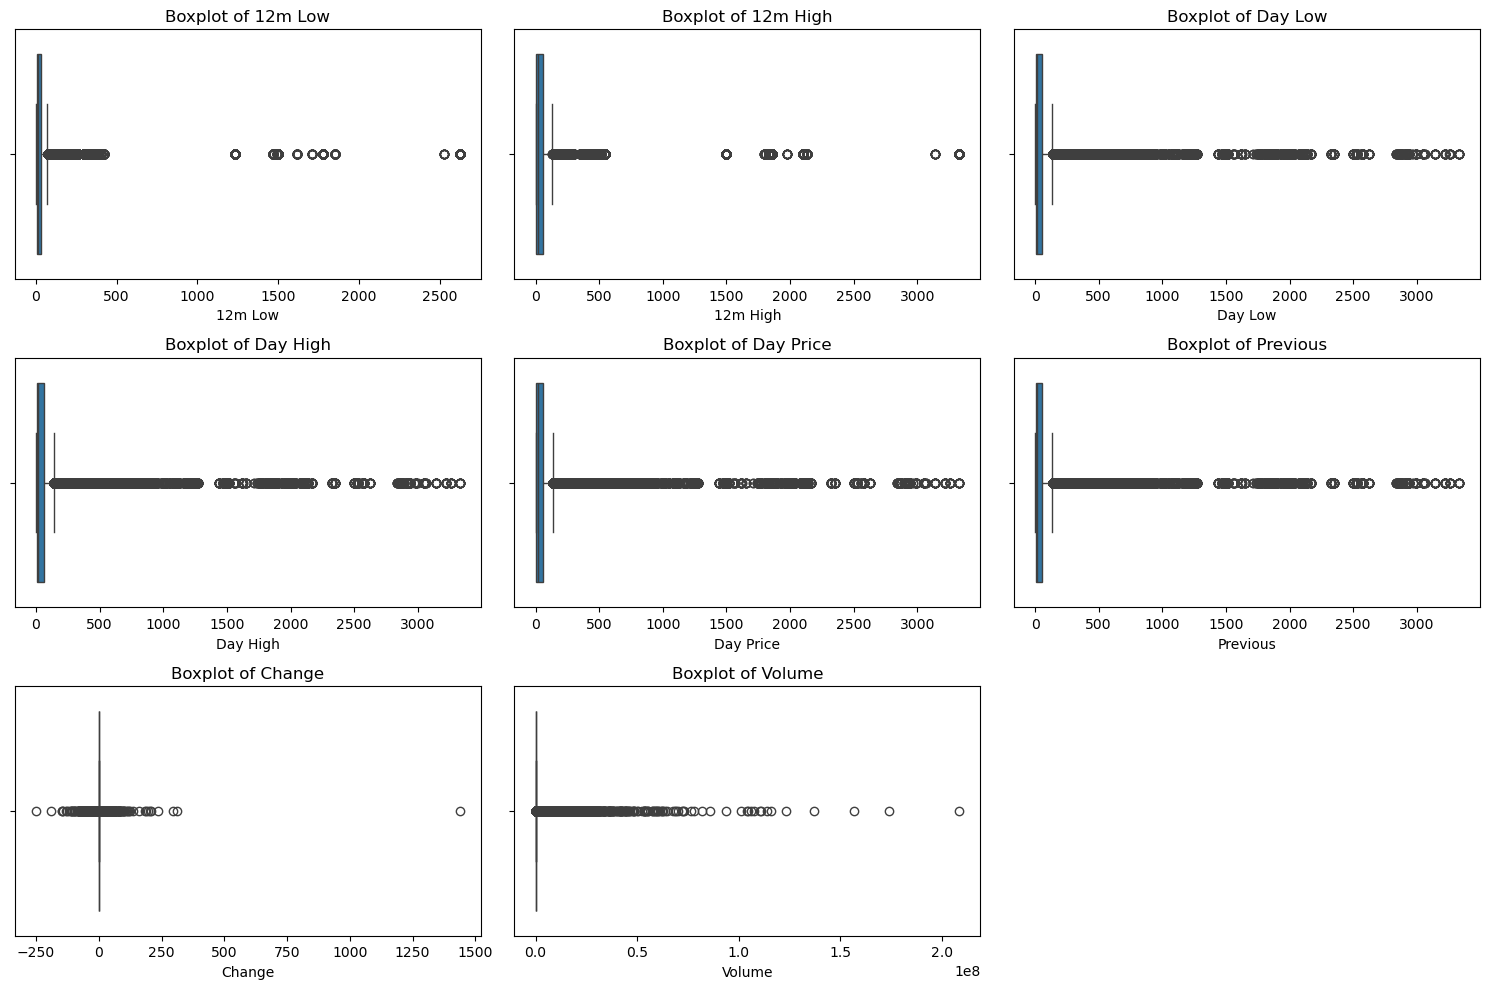

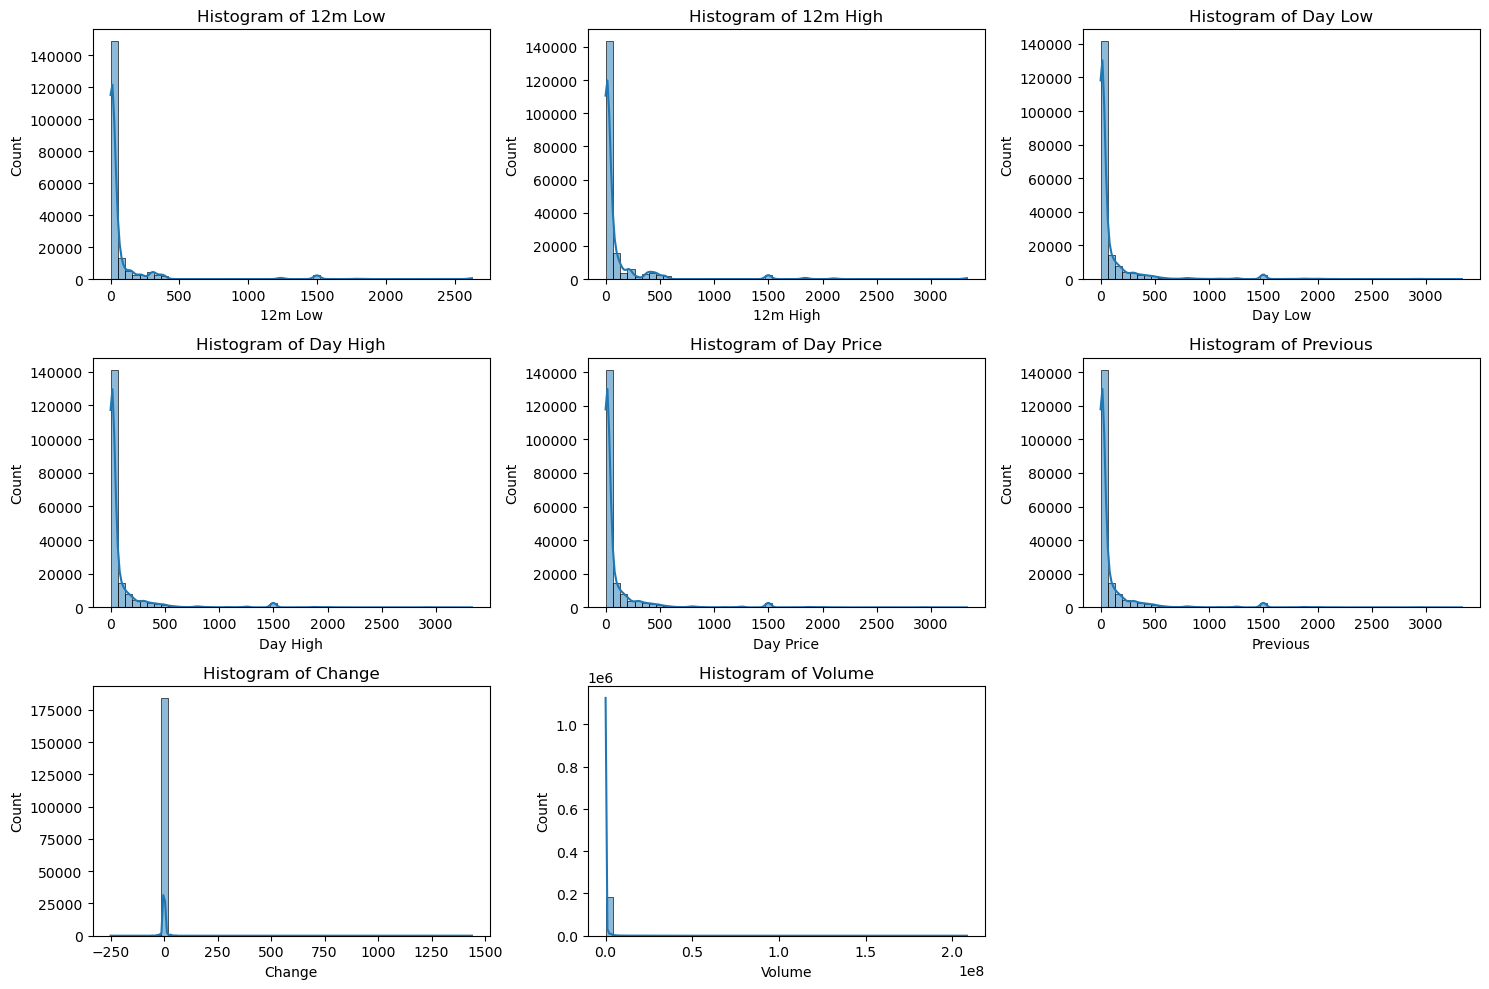

In [25]:
plt.figure(figsize = (15, 10))

# Boxplot for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = nse_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Histogram for each numerical column
plt.figure(figsize = (15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(nse_data[col], kde = True, bins = 50)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


While the bulk of the data is at the lower end, there's a long tail extending towards higher values (up to approximately 2500 for "12m Low" and over 3000 for "12m High" and "Day Low"). This signifies that a smaller number of instances have significantly higher values for these metrics.

Each histogram is heavily skewed to the right. The overwhelming majority of the data points are concentrated at very low values (close to 0), with counts often exceeding 120,000 to 140,000. This indicates that for most observations, the "Day High," "Day Price," and "Previous" values are very low.

"Change" Feature: This feature is highly concentrated around zero, implying frequent periods of little to no price movement. While generally symmetrical, it exhibits a noticeable right tail, indicating that large positive changes are more common than large negative ones within the observed range.

"Volume" Feature: This feature is characterized by extreme right-skewness, with the vast majority of observations having very low volumes and a few instances of extremely high volumes. This kind of distribution is typical of count data or phenomena where a large number of events are small, and a few are very large.

### 3.2 Bivariate Analysis.

#### Top 10 Stocks by Volume and Price Change

Top 10 stocks by total volume:
Code
SCOM    2.959450e+10
LAPR    1.252750e+10
EQTY    6.770691e+09
KCB     5.392578e+09
HBE     2.486856e+09
COOP    2.483624e+09
ABSA    2.079048e+09
KPLC    2.029433e+09
KEGN    1.962444e+09
MSC     1.749560e+09
Name: Volume, dtype: float64
Top 10 stocks by total price change:
Code
EVRD    8461.50
UCHM    7883.35
SMER    7651.54
OCH     7552.21
TCL     7407.08
HAFR    7328.09
FTGH    6653.78
LBTY    6613.74
LKL     6568.93
CABL    6502.93
Name: Change%, dtype: float64


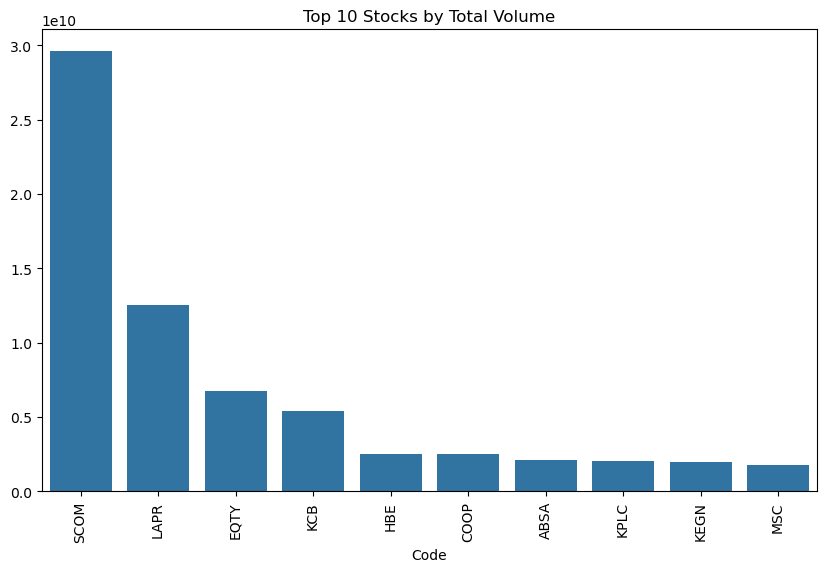

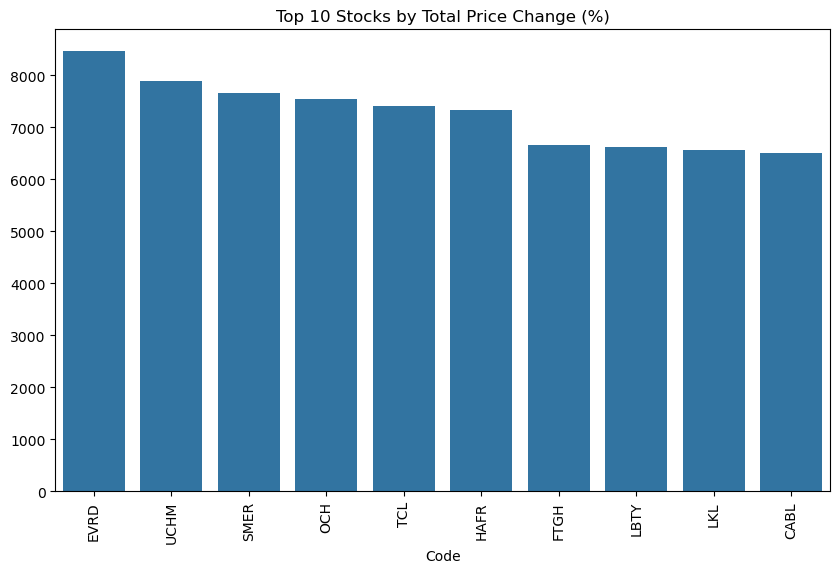

In [26]:
top_volume_stocks = nse_data.groupby('Code')['Volume'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 stocks by total volume:\n{top_volume_stocks}")
plt.figure(figsize = (10, 6))
sns.barplot(x = top_volume_stocks.index, y = top_volume_stocks.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Stocks by Total Volume')

# Top 10 stocks by price change (Change%)
top_change_stocks = nse_data.groupby('Code')['Change%'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 stocks by total price change:\n{top_change_stocks}")
plt.figure(figsize = (10, 6))
sns.barplot(x = top_change_stocks.index, y = top_change_stocks.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Stocks by Total Price Change (%)')
plt.show()

The most striking observation is the overwhelming dominance of the stock SCOM. Its total volume is approximately 2.9 x 10¹⁰ (29 billion), which is more than double the volume of the second-ranked stock, LAPR (approximately 1.2 x 10¹⁰ or 12 billion).
This indicates a highly concentrated trading activity, with SCOM being an exceptionally liquid or actively traded stock compared to all others in the top 10.

Significant Drop-off: There's a steep decline in total volume after "SCOM" and "LAPR."



All stocks in the top 10 list show incredibly high positive price changes, indicating significant appreciation over the period analyzed. The lowest change among these top performers is approximately 6,500%, while the highest approaches 8,300%.

"EVRD" is the top performer, registering a total price change of roughly 8,300%.

There is a relatively close clustering of performance among the top few stocks. "UCHM," "SMER," "OCH," "TCL," and "HAFR" all exhibit price changes in the range of 7,300% to 7,900%, showing strong and comparable growth.

#### Sector Performance

Analysis will involve checking for which sectors have the highest total volume traded and which ones have the highest average price change. This will help in understanding which sectors are the most popular in the NSE as well as how volatile each sector is.

Total volume by sector:
Sector
Telecommunication              2.959586e+10
Banking                        1.855745e+10
Investment                     1.405546e+10
Construction and Allied        5.253647e+09
Commercial and Services        4.603678e+09
Insurance                      4.134705e+09
Manufacturing and Allied       2.988082e+09
Investment Services            3.118618e+08
Agricultural                   1.108250e+08
Automobiles and Accessories    7.211700e+06
Name: Volume, dtype: float64
Average price change by sector:
Sector
Commercial and Services        2.008086
Investment                     1.945548
Investment Services            1.709207
Insurance                      1.656314
Automobiles and Accessories    1.540956
Manufacturing and Allied       1.322894
Construction and Allied        1.225254
Agricultural                   1.214713
Banking                        1.171780
Telecommunication              0.744470
Name: Change%, dtype: float64


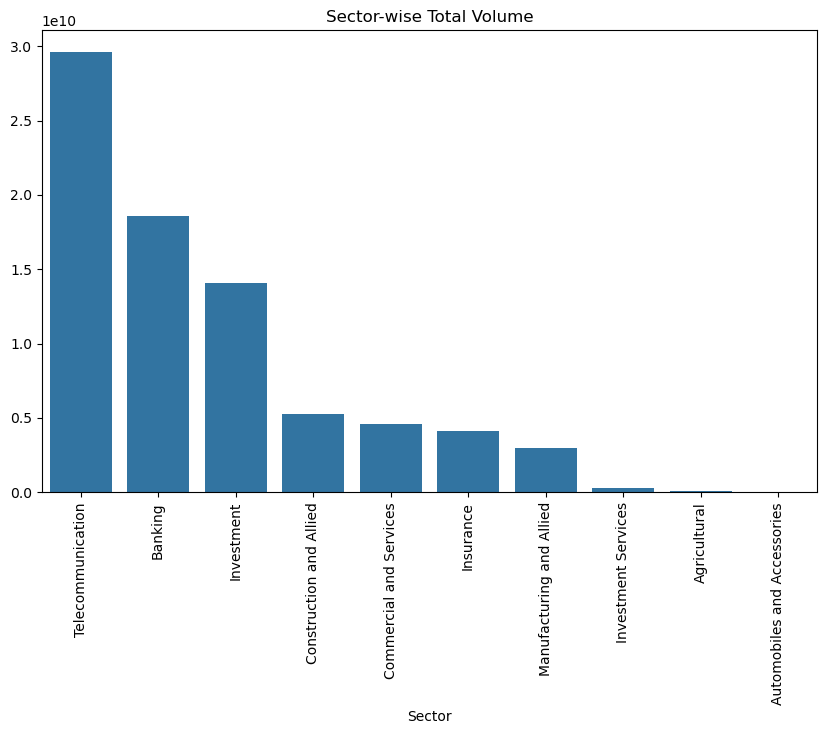

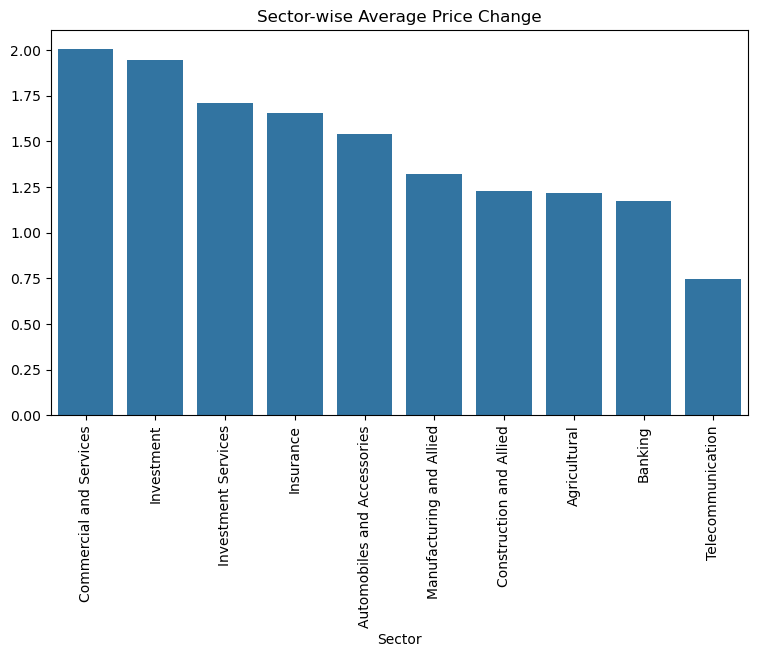

In [27]:
sector_volume = nse_data.groupby('Sector')['Volume'].sum().sort_values(ascending = False)
print(f"Total volume by sector:\n{sector_volume}")

# Calculating average price change by sector
sector_change = nse_data.groupby('Sector')['Change%'].mean().sort_values(ascending = False)
print(f"Average price change by sector:\n{sector_change}")

# Sector volume
plt.figure(figsize = (10, 6))
sns.barplot(x = sector_volume.index, y = sector_volume.values)
plt.xticks(rotation = 90)
plt.title('Sector-wise Total Volume')
plt.show()

# Sector average price change
plt.figure(figsize = (9, 5))
sns.barplot(x = sector_change.index, y = sector_change.values)
plt.xticks(rotation = 90)
plt.title('Sector-wise Average Price Change')
plt.show()

Telecommunication Dominance: The Telecommunication sector exhibits an overwhelmingly high total trading volume, reaching approximately 42 billion units. This volume is more than double that of the next highest sector.

Banking Sector's Significance: The Banking sector secures the second position with a substantial total volume of about 18.5 billion units, highlighting its considerable market activity.

The "Investment," "Investment Services," "Agricultural," and "Automobiles and Accessories" sectors show significantly lower trading volumes, ranging from about 1.5 billion down to just 0.2 billion, indicating relatively less market activity in these areas.

Market liquidity and investor interest are highly concentrated within a few key sectors.

The "Commercial and Services" and "Investment" sectors demonstrate the highest average price change, both registering approximately 2.0 units. This indicates strong positive performance on average within these sectors.

Sectors such as "Investment Services," "Insurance," "Automobiles and Accessories," and "Manufacturing and Allied" show moderate average price changes, ranging from roughly 1.7 down to 1.3.

Conversely, the "Telecommunication" sector shows the weakest average price change. This differentiation highlights the diverse dynamics and investment opportunities or risks present across different market sectors.

#### Price and Volume Trends Over Time

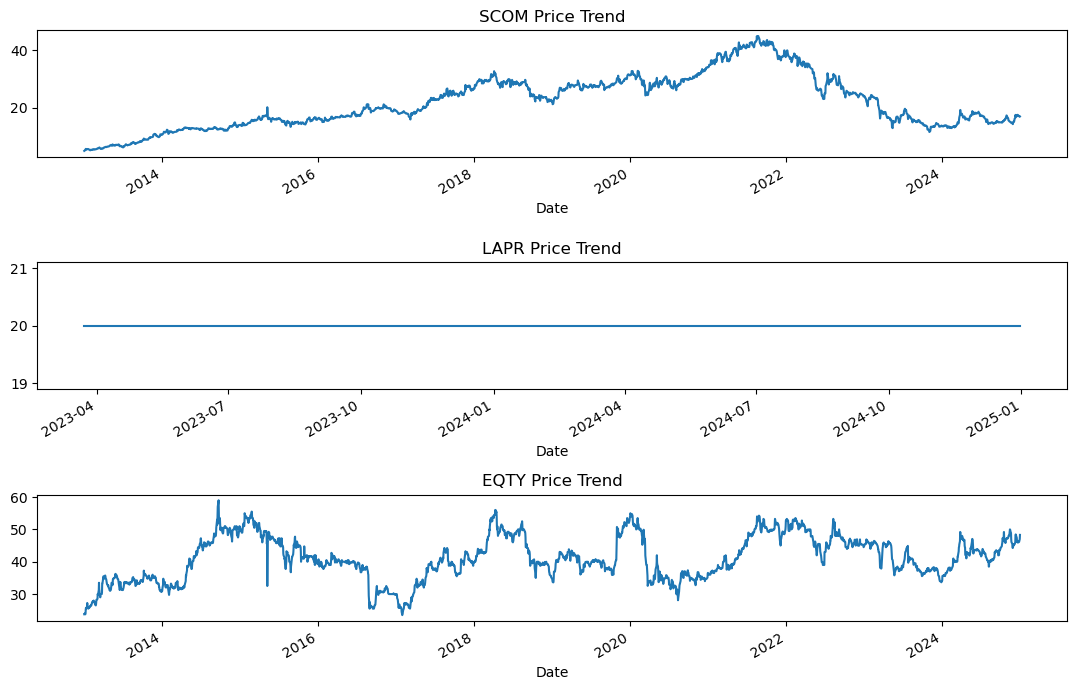

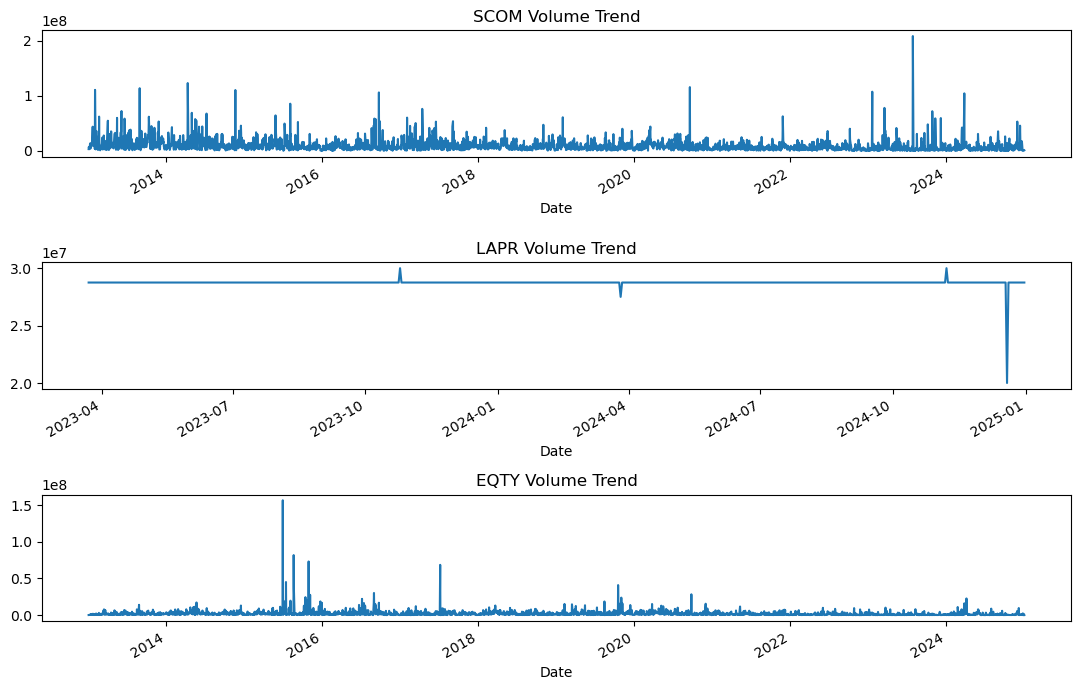

In [28]:
# Plotting the price trends for top 3 stocks by volume
sample_stocks = top_volume_stocks.index[:3]

plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Day Price'].plot(title = f'{stock} Price Trend')
plt.tight_layout()
plt.show()

# Volume trends for top 3 stocks
plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Volume'].plot(title = f'{stock} Volume Trend')
plt.tight_layout()
plt.show()

Long-term Growth & Correction: From early 2013, SCOM experienced a steady and significant upward price trend, peaking around mid-2022 at approximately 42 units.
The stock has shown considerable volatility, particularly during its growth phase and subsequent decline.

Over the period shown (early 2023 to early 2025), LAPR's price trend is remarkably flat, consistently holding at approximately 20 units. This extreme stability suggests either very low trading activity, a fixed pricing mechanism

EQTY's price trend over the period from early 2013 to early 2025 is characterized by high volatility and cyclical patterns. The price fluctuates significantly, generally within a range of 30 to 60 units.

Consistent Activity with Spikes:SCOM over the period from early 2013 to early 2025, SCOM generally maintains a baseline trading volume, but it is frequently punctuated by notable and sometimes very significant spikes in volume. These spikes indicate bursts of intense trading activity.

From early 2023 to early 2025, LAPR exhibits an unusually flat and stable trading volume, consistently hovering around 2.8 x 10⁷ units for most of the period.

EQTY's volume trend from early 2013 to early 2025 shows a generally lower average trading volume compared to SCOM, but it also experiences significant, albeit less frequent, spikes.

#### Top 3 Price change trend.

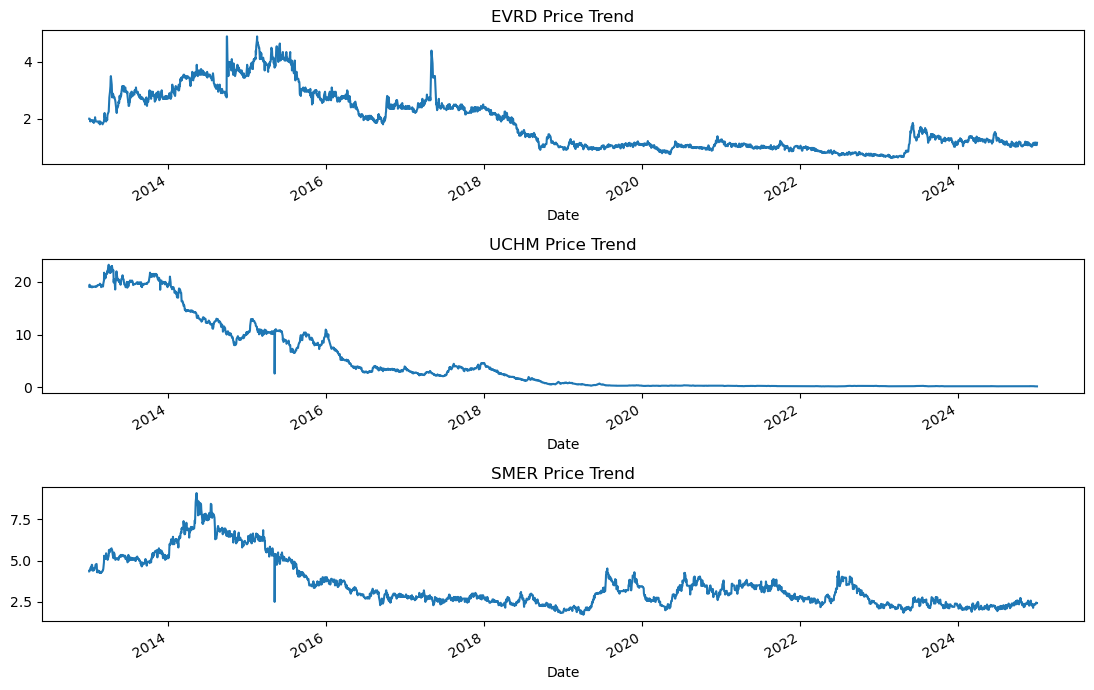

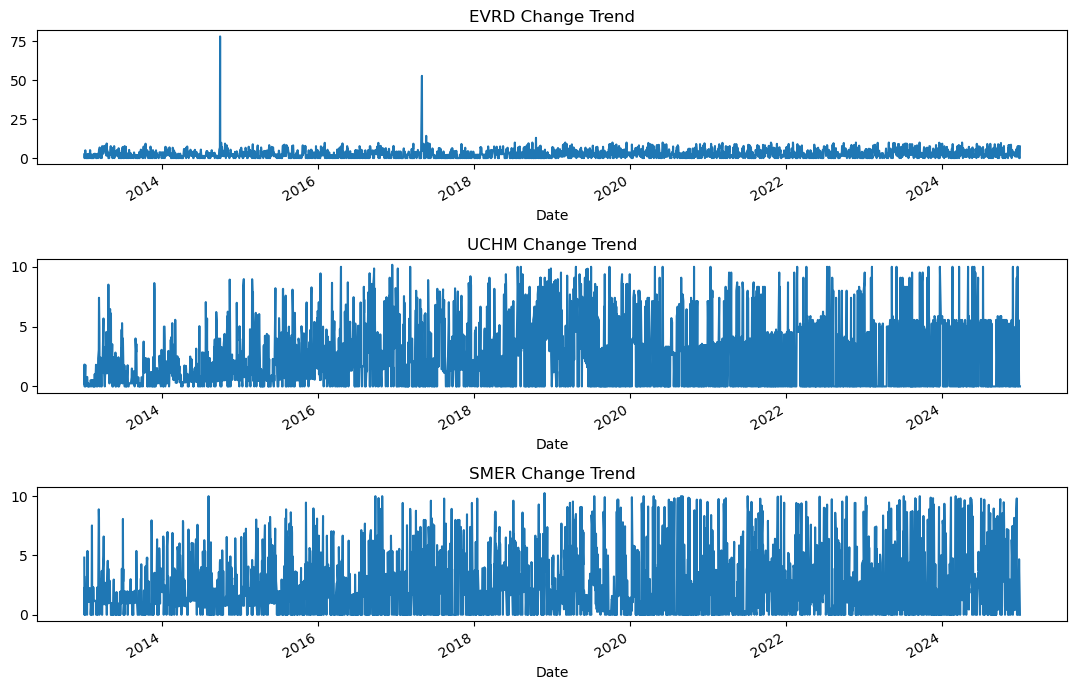

In [29]:
# Plotting the price trends for top 3 by change
sample_stocks = top_change_stocks.index[:3]

plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Day Price'].plot(title = f'{stock} Price Trend')
plt.tight_layout()
plt.show()

# Volume trends for top 3 stocks
plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Change%'].plot(title = f'{stock} Change Trend')
plt.tight_layout()
plt.show()

EVRD experienced a strong upward trend from 2013, peaking around mid-2015 at approximately 4.5 units. Subsequently, it embarked on a prolonged downward trend, with intermittent recoveries, settling at a much lower price level, fluctuating between 1.0 and 2.5 units for most of the later period.

UCHM shows a stark and consistent downtrend following an initial peak of over 20 units in early 2014. The price experienced a sharp decline, falling below 1.0 unit by late 2018.

SMER reached a peak of approximately 8.0 units in late 2014, followed by a substantial decline to around 2.5 units by mid-2016.

EVRD's daily price changes are typically small, mostly fluctuating between 0 and 10 units. However, the stock is prone to rare but significant positive spikes, with "Change" values reaching up to approximately 75 units. These sharp spikes indicate isolated periods of very large price movements.

UCHM experiences considerable price movement on a day-to-day basis. Given its previously observed long-term price decline, this implies significant daily absolute changes, regardless of direction.

SMER also undergoes significant price movements on a regular daily basis, indicative of a highly active and volatile trading environment.

#### Day Price trend over Time.

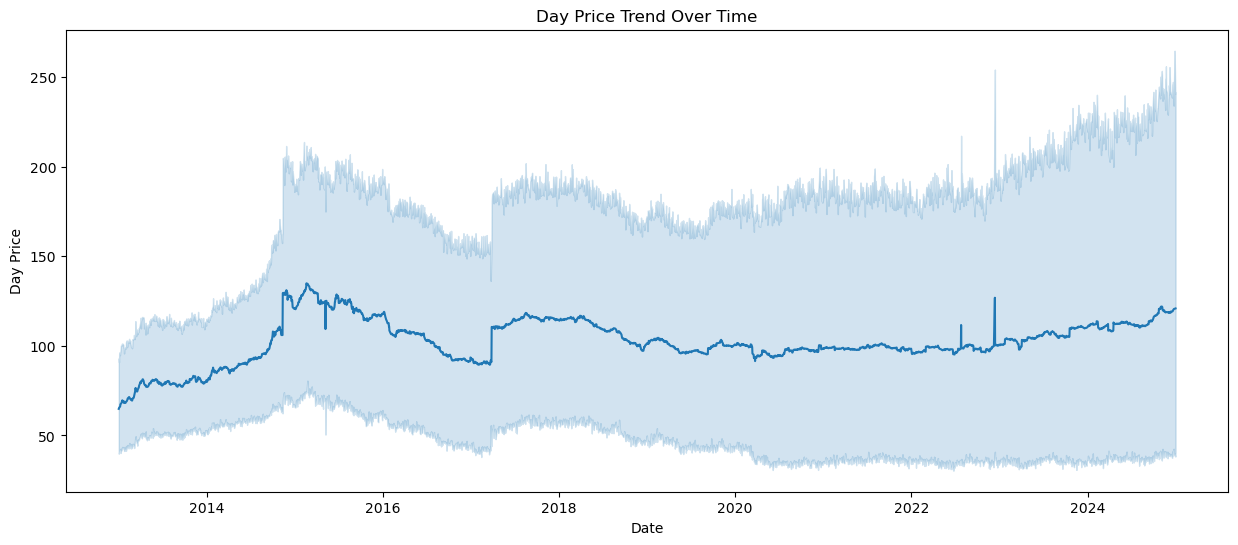

In [30]:
#Day price trend
plt.figure(figsize = (15, 6))
sns.lineplot(x = 'Date', y = 'Day Price', data = nse_data)
plt.title('Day Price Trend Over Time')
plt.show()

Initial Growth and Subsequent Decline (2013-2017): The "Day Price" showed a strong upward trend from early 2013, peaking around mid-2015 with prices reaching approximately 130 units on average. Following this peak, there was a noticeable decline until mid-2017, where the average price settled around 90 units.

Period of Relative Stability with Fluctuations (2017-2023): From mid-2017 to mid-2023, the average "Day Price" entered a phase of relative stability, generally fluctuating within a band of approximately 90 to 120 units. While stable, there were noticeable short-term price spikes within this period, indicating occasional bursts of higher average prices.

Recent Uptick (2023-2025): From mid-2023 onwards to early 2025, there appears to be a moderate upward trend, with the average 
price rising from around 100 to 120 units.



#### Cumulative Change Percentage.

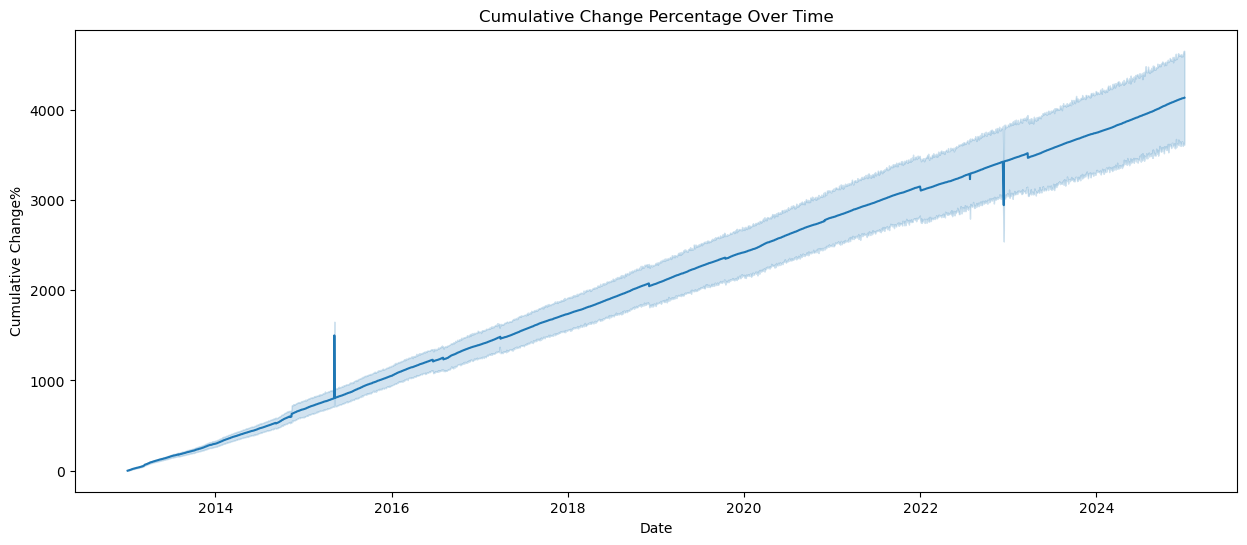

In [31]:
#Cumulative Change%.
nse_data['Cumulative Change%'] = nse_data.groupby('Code')['Change%'].cumsum()
plt.figure(figsize = (15, 6))
sns.lineplot(x = 'Date', y = 'Cumulative Change%', data = nse_data)
plt.title('Cumulative Change Percentage Over Time')
plt.show()

Consistent Upward Trend: The cumulative change percentage shows a remarkably consistent and strong upward trend throughout the entire period. Starting near 0% in early 2013, it steadily climbs to reach over 4000% by early 2025. This indicates a sustained period of positive cumulative growth.

Steady Rate of Change: The slope of the main trend line appears relatively constant, suggesting a fairly steady rate of positive cumulative change over the long term, rather than periods of accelerating or decelerating growth.

While the overall trend is smooth, two distinct periods show a temporary sharp increase in the main trend line and a wider spread in the shaded area: one around late 2015 / early 2016 and another around late 2022 / early 2023. These could represent periods of accelerated growth or increased volatility.

A robust and sustained long-term positive cumulative change, indicating consistent overall growth over the past decade.

#### Relative Strength over Time.

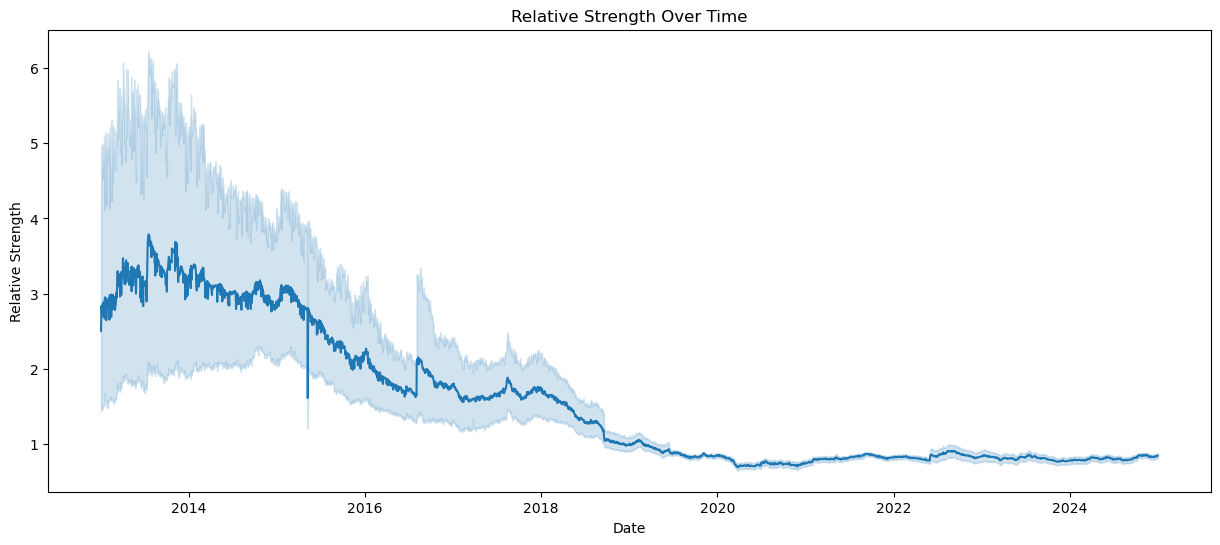

In [32]:
# Plotting Relative Strength: Plot Day Price / 12m High to show proximity to annual highs.
plt.figure(figsize = (15, 6))
nse_data['Relative Strength'] = nse_data['Day Price'] / nse_data['12m High']
sns.lineplot(x = 'Date', y = 'Relative Strength', data = nse_data)
plt.title('Relative Strength Over Time')
plt.show()

Early Strong Performance (2013-2014): In the initial period, from early 2013 to mid-2014, the Relative Strength was high, consistently fluctuating between approximately 3.0 and 3.5. This indicates that the "Day Price" was frequently trading significantly above its previous 12-month highs, suggesting strong positive momentum or a sustained upward price trend in which new 12-month highs were being consistently surpassed. This period also showed high volatility in this metric.

Sustained Decline (2014-2020): Following this strong period, there was a clear and consistent decline in Relative Strength from mid-2014, eventually dropping below 1.0 by late 2019/early 2020. This signifies that the "Day Price" gradually moved further away from, and eventually consistently below, its 12-month highs, indicating a reversal of momentum and a weakening price trend relative to its recent peaks. The volatility in Relative Strength also decreased during this decline.

Recent Underperformance and Stability (2020-2025): From early 2020 onwards to early 2025, the Relative Strength has remained at a very low and stable level, fluctuating narrowly around 0.8 to 0.9. This indicates that the "Day Price" has consistently traded significantly below its 12-month highs, suggesting a prolonged period of underperformance relative to its annual peaks, with minimal short-term fluctuations in this relative measure.

A notable shift from a period where the asset was frequently setting or exceeding its 12-month highs, to a prolonged period where it consistently trades at levels significantly below those highs, reflecting a sustained decline in its relative strength.

### 3.3 Multivariate Analysis

Correlation Analysis

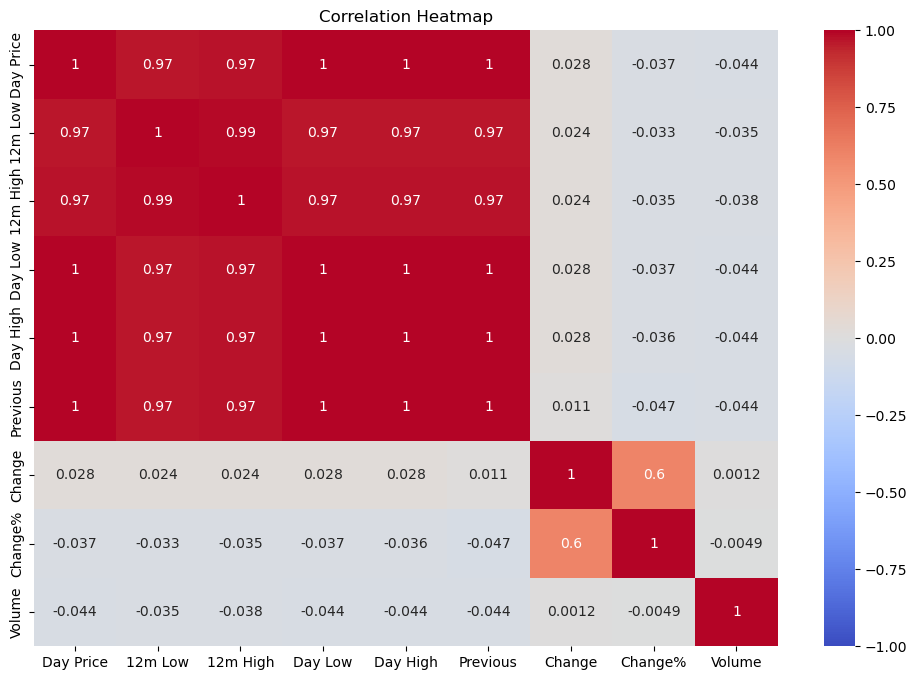

In [33]:
correlation_matrix = nse_data[['Day Price', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Change', 'Change%', 'Volume']].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

Extremely Strong Positive Correlation: Features directly related to stock price levels, including 'Day Price', '12m Low', '12m High', 'Day Low', 'Day High', and 'Previous' price, show exceptionally high positive correlations with each other

Moderate Positive Correlation: 'Change' (absolute daily price change) and 'Change%' (daily percentage price change) exhibit a moderate positive correlation of 0.6. This is logical, as percentage change is derived from the absolute change but scaled by the prior day's price, preventing a perfect 1.0 correlation.

Weak or Negligible Correlations with Price Movements and Volume:

Price Levels vs. Changes: All the price-related features ('Day Price', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous') show very weak or negligible linear correlations (coefficients close to zero, e.g., 0.028, -0.037) with 'Change' and 'Change%'. This suggests that the absolute price level of a stock has little to no linear relationship with the magnitude or direction of its daily price movements.
Volume vs. Other Features: 'Volume' demonstrates extremely weak linear correlations with all other features, including price levels, price changes, and percentage changes (coefficients ranging from -0.044 to 0.0012). This indicates that trading volume is largely linearly independent of stock prices and their daily movements.

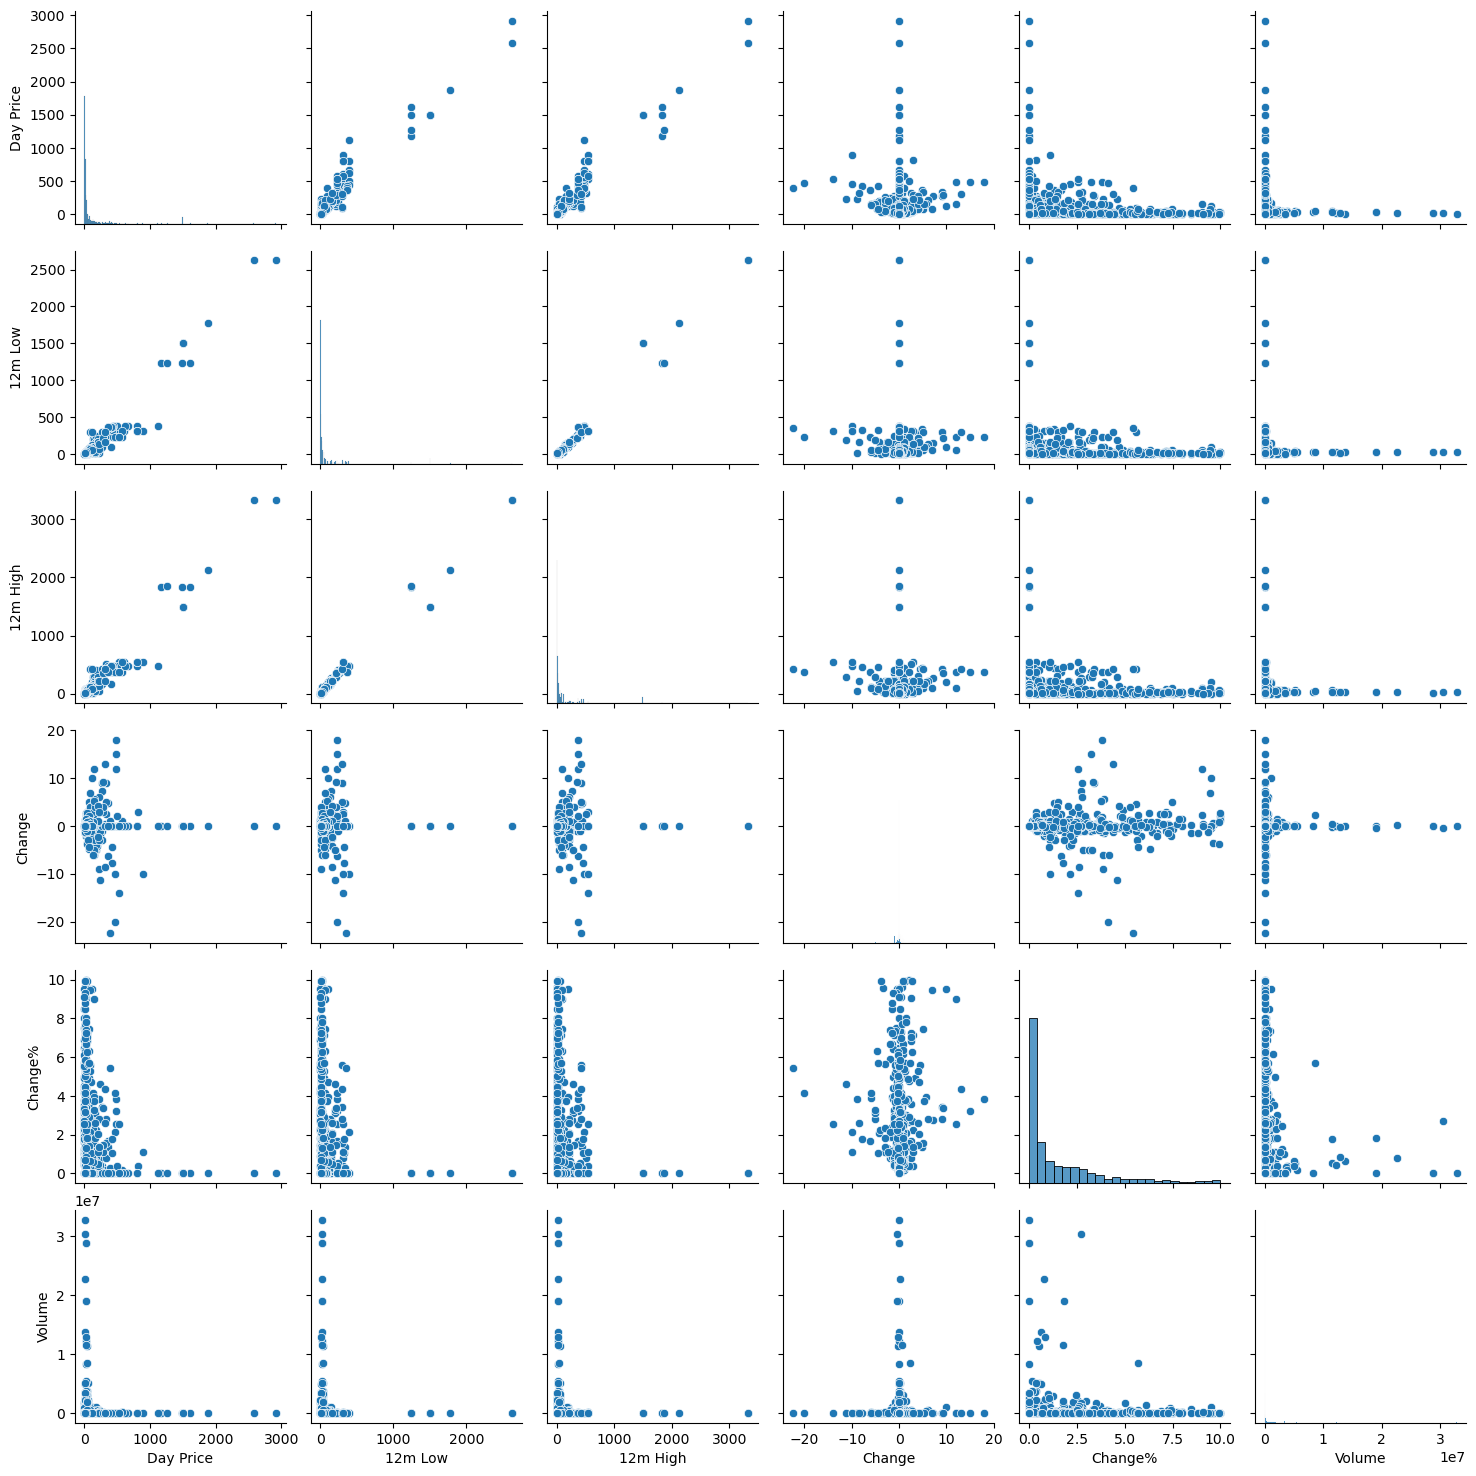

In [34]:
sampled_data = nse_data[['Day Price', '12m Low', '12m High', 'Change', 'Change%', 'Volume']].sample(n = 1000, random_state = 42)
sns.pairplot(sampled_data)
plt.show()

## 4. Feature Engineering.

#### I. Moving Averages(SMA and EMA)

We calculate 10-day and 50-day Simple Moving Averages(SMA), as well as the 10-day and 50-day Exponential Moving Averages(EMA), to highlight trends.

In [35]:
nse_data.sort_values(by = ['Code', 'Date'], inplace = True)
nse_data.reset_index(drop = True, inplace = True)

In [36]:
nse_data['SMA_10'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.rolling(window = 10).mean())
nse_data['SMA_50'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.rolling(window = 50).mean())
nse_data['EMA_10'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.ewm(span = 10, adjust = False).mean())
nse_data['EMA_50'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.ewm(span = 50, adjust = False).mean())

**SMA_10** and **SMA_50**: Simple moving averages over 10 and 50 trading days.  
**EMA_10** and **EMA_50**: Exponential moving averages over 10 and 50 days (more weight to recent prices).

These indicators help smooth out price fluctuations and identify overall market trends, making them essential for detecting potential reversals or continuations in stock movement.

While SMA assigns equal weight to all past prices, EMA prioritizes recent price data, making it more reactive to short-term shifts in market conditions.

Moving averages are used for trend identification, entry/exit points, and confirmation of breakout patterns, helping traders refine their decisions.

They provide a comprehensive view of price trends, from immediate shifts to sustained long-term directions, making them indispensable tools for financial analysis and predictive modeling

In [37]:
nse_data.isnull().sum()

index                    0
Date                     0
Code                     0
Name                     0
12m Low                  0
12m High                 0
Day Low                  0
Day High                 0
Day Price                0
Previous                 0
Change                   0
Change%                  0
Volume                   0
Sector                   0
Cumulative Change%       0
Relative Strength        0
SMA_10                 594
SMA_50                3234
EMA_10                   0
EMA_50                   0
dtype: int64

In [38]:
nse_data[['SMA_10', 'SMA_50']] = (
    nse_data.groupby('Code')[['SMA_10', 'SMA_50']].transform(lambda x: x.bfill())
)

In [39]:
nse_data.isnull().sum()

index                 0
Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              0
Change                0
Change%               0
Volume                0
Sector                0
Cumulative Change%    0
Relative Strength     0
SMA_10                0
SMA_50                0
EMA_10                0
EMA_50                0
dtype: int64

#### II. Relative Strength Index(RSI).
The RSI measures the speed and change of price movements. Values above 70 indicate that a stock is overbought while values below 30 indicate that it's oversold.

The Relative Strength Index (RSI) is a momentum indicator that helps assess the strength of price trends, offering insights into potential reversals or continuations in stock movement.

RSI is calculated based on average gains and losses over a specified period (typically 14 days). Readings above 70 suggest overbought conditions, meaning the stock might be due for a correction, while readings below 30 indicate oversold conditions, suggesting potential buying opportunities.

When price movements contradict RSI trends, it may signal trend reversals—for instance, if prices hit new highs while RSI forms lower highs, it could indicate weakening momentum.

A high RSI indicates that a security has been experiencing strong upward price movements, while a low RSI suggests strong downward price movements.

RSI is a powerful tool for gauging the internal strength of price movements, helping to identify potential turning points and providing valuable momentum context for robust financial analysis and predictive modeling.

In [40]:
# function to calculate the RSI
def compute_rsi(data, window = 14):
    delta = data.diff()
    gain = delta.clip(lower = 0)
    loss = -delta.clip(upper = 0)

    avg_gain = gain.rolling(window = window, min_periods = window).mean()
    avg_loss = loss.rolling(window = window, min_periods = window).mean()

    # Add epsilon to avoid division by zero
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Applying the function
nse_data['RSI'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: compute_rsi(x))

In [41]:
nse_data.isnull().sum()

index                   0
Date                    0
Code                    0
Name                    0
12m Low                 0
12m High                0
Day Low                 0
Day High                0
Day Price               0
Previous                0
Change                  0
Change%                 0
Volume                  0
Sector                  0
Cumulative Change%      0
Relative Strength       0
SMA_10                  0
SMA_50                  0
EMA_10                  0
EMA_50                  0
RSI                   924
dtype: int64

The RSI also has null values that we'll fill the same as the SMA.

In [42]:
# Filling the missing RSI values with the first valid RSI value
nse_data['RSI'] = nse_data.groupby('Code')['RSI'].fillna(method = 'bfill')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9428\769254341.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  nse_data['RSI'] = nse_data.groupby('Code')['RSI'].fillna(method = 'bfill')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9428\769254341.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nse_data['RSI'] = nse_data.groupby('Code')['RSI'].fillna(method = 'bfill')


In [43]:
#Checking for the missing value.
nse_data.isnull().sum()

index                 0
Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              0
Change                0
Change%               0
Volume                0
Sector                0
Cumulative Change%    0
Relative Strength     0
SMA_10                0
SMA_50                0
EMA_10                0
EMA_50                0
RSI                   0
dtype: int64

### Adding Lag Features.

It involves creating new features by shifting existing time-series data backward by one or more time steps.

By incorporating lag features, you transform a simple time series into a tabular dataset where each row contains not only the current observations but also relevant historical context, making it suitable for a wide range of supervised machine learning algorithms.



In [44]:
lag_features = ['Day Price', 'RSI', 'EMA_10']
lags = [1, 2, 3]

for feature in lag_features:
    for lag in lags:
        nse_data[f'{feature}_lag{lag}'] = nse_data.groupby('Code')[feature].shift(lag)

In [45]:
nse_data.isnull().sum()

index                   0
Date                    0
Code                    0
Name                    0
12m Low                 0
12m High                0
Day Low                 0
Day High                0
Day Price               0
Previous                0
Change                  0
Change%                 0
Volume                  0
Sector                  0
Cumulative Change%      0
Relative Strength       0
SMA_10                  0
SMA_50                  0
EMA_10                  0
EMA_50                  0
RSI                     0
Day Price_lag1         66
Day Price_lag2        132
Day Price_lag3        198
RSI_lag1               66
RSI_lag2              132
RSI_lag3              198
EMA_10_lag1            66
EMA_10_lag2           132
EMA_10_lag3           198
dtype: int64

In [46]:
# Dropping Null values
nse_data.dropna(subset = [
    'Day Price_lag1', 'Day Price_lag2', 'Day Price_lag3',
    'RSI_lag1', 'RSI_lag2', 'RSI_lag3',
    'EMA_10_lag1', 'EMA_10_lag2', 'EMA_10_lag3'
], inplace = True)

## 5. Modeling

To perform forecasting, a combination of SARIMA, XGBoost, and LSTM models was employed, each contributing unique strengths to time series analysis. SARIMA (Seasonal AutoRegressive Integrated Moving Average) is an extension of the traditional ARIMA model that effectively captures both linear trends and seasonal patterns in time series data. XGBoost, a robust gradient boosting algorithm, improves predictive performance by modeling complex relationships and highlighting important features. LSTM (Long Short-Term Memory), a type of recurrent neural network, is well-suited for detecting long-term dependencies and nonlinear dynamics in sequential data, making it particularly useful for modeling the volatility of financial time series. This ensemble approach offers a well-rounded framework for forecasting, combining statistical structure, machine learning flexibility, and deep learning sophistication.

### Checking for Seasonality.

<Figure size 864x720 with 0 Axes>

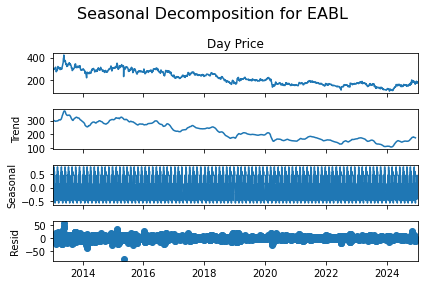

In [ ]:
stock_code = 'EABL'
stock_df = nse_data[nse_data['Code'] == stock_code].sort_values('Date')

# Set date as index
stock_df.set_index('Date', inplace = True)


result = seasonal_decompose(stock_df['Day Price'], model = 'additive', period = 30)

# Plot the decomposition
plt.figure(figsize = (12, 10))
result.plot()
plt.suptitle(f'Seasonal Decomposition for {stock_code}', fontsize = 16)
plt.tight_layout()
plt.show()

 **Seasonal**  
The repeated, tightly packed wave-like pattern suggests strong seasonality in the stock prices, likely influenced by periodic business cycles, holidays, or financial quarters.

The amplitude (height of oscillation) appears relatively consistent over time.

The seasonal decomposition of EABL Day Price reveals that the primary driver of its long-term movement is the Trend component, which showed a significant decline followed by stabilization and modest recovery. A consistent, yet relatively small-magnitude, seasonal pattern is also present, contributing to short-term predictability. Finally, the Residuals indicate that while much of the price movement is explained, there are still notable unpredictable events or noise influencing the price, especially evident in the occasional large spikes.


Since the seasonality is clear, we'll use SARIMA to capture both the trend and seasonal components of the data.

### 5.1 SARIMAX(Seasonal AutoRegressive Integrated Moving Average).

In [ ]:
# Get unique stock codes
stock_codes = nse_data['Code'].unique()

# Store metrics
results = []

for code in tqdm(stock_codes):
    stock_df = nse_data[nse_data['Code'] == code].copy()
    stock_df = stock_df.sort_values('Date')
    stock_df.set_index('Date', inplace=True)
    
    # Use data from 2023 onward
    stock_df = stock_df['2023':]
    
    if len(stock_df) < 60:
        continue  # Skip stocks with insufficient data

    # Forecast last 30 days
    n_forecast = 30
    seasonal_period = 30
    train_data = stock_df.iloc[:-n_forecast]
    test_data = stock_df.iloc[-n_forecast:]

    try:
        model = SARIMAX(
            train_data['Day Price'],
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, seasonal_period),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)
        forecast = model_fit.get_forecast(steps=n_forecast)
        forecast_mean = forecast.predicted_mean

        # Metrics
        mae = mean_absolute_error(test_data['Day Price'], forecast_mean)
        rmse = np.sqrt(mean_squared_error(test_data['Day Price'], forecast_mean))
        r2 = r2_score(test_data['Day Price'], forecast_mean)

        results.append({
            'Stock': code,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })
    except Exception as e:
        print(f"Model failed for {code}: {e}")
        continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values('R2', ascending=False))

# Average R²
avg_r2 = results_df['R2'].mean()
print(f"\nAverage R² across all stocks: {avg_r2:.4f}")

  0%|          | 0/66 [00:00<?, ?it/s]c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result

      Stock        MAE       RMSE          R2
33  KPLC-P7   0.000000   0.000000    1.000000
42      NBK   0.000000   0.000000    1.000000
41      MSC   0.000000   0.000000    1.000000
37     LAPR   0.000000   0.000000    1.000000
1       ARM   0.000000   0.000000    1.000000
..      ...        ...        ...         ...
31     KPLC   1.026987   1.174903   -9.414550
50     SASN   1.076952   1.161997  -10.584225
55      SGL   0.490234   0.533926  -12.901995
35     KUKZ  51.703741  52.119019  -64.047704
49     PORT  26.923815  27.776274 -117.974022

[66 rows x 4 columns]

Average R² across all stocks: -4.5003


In [61]:
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

print(f"Average MAE: {average_mae:.4f}")
print(f"Average RMSE: {average_rmse:.4f}")

Average MAE: 3.3613
Average RMSE: 3.8885


C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Day Price   No. Observations:                  462
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                -173.611
Date:                            Mon, 12 May 2025   AIC                            357.222
Time:                                    03:54:43   BIC                            377.167
Sample:                                         0   HQIC                           365.121
                                            - 462                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0912      0.143      0.638      0.523      -0.189       0.371
ma.L1          0.1877      0.141   

C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


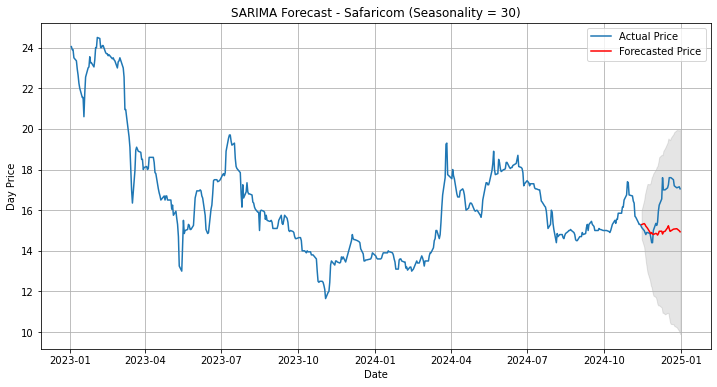

In [ ]:
# Filter and prepare Safaricom data
safaricom_data = nse_data[nse_data['Code'] == 'SCOM'].copy()
safaricom_data = safaricom_data.sort_values('Date')
safaricom_data.set_index('Date', inplace=True)
safaricom_data = safaricom_data['2023':'2024']

# Define reduced seasonal period (e.g., monthly seasonality ~30 days)
seasonal_period = 30

# Split into training and test sets
n_forecast = 30
train_data = safaricom_data.iloc[:-n_forecast]
test_data = safaricom_data.iloc[-n_forecast:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(
    train_data['Day Price'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, seasonal_period),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())

# Forecast the test period
forecast = sarima_results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calculate evaluation metrics
test_forecast_mean = forecast_mean
mae = mean_absolute_error(test_data['Day Price'], test_forecast_mean)
mse = mean_squared_error(test_data['Day Price'], test_forecast_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_data['Day Price'], test_forecast_mean)

print(f"\nEvaluation Metrics on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}\n")

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(safaricom_data['Day Price'], label='Actual Price')
forecast_index = test_data.index
plt.plot(forecast_index, forecast_mean, label='Forecasted Price', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('SARIMA Forecast - Safaricom (Seasonality = 30)')
plt.xlabel('Date')
plt.ylabel('Day Price')
plt.legend()
plt.grid(True)
plt.show()


Despite the relatively small absolute errors (MAE and RMSE), the negative R-squared value of -0.8834 indicates that the SARIMA model is a very poor fit for the data on the test set. This suggests that the model fundamentally fails to capture the underlying patterns and variance in the time series, providing predictions that are less accurate than a simple average.

### 5.2 XGBOOST.

In [ ]:
# Encoding the Stock Code
le = LabelEncoder()
nse_data['Code_enc'] = le.fit_transform(nse_data['Code'])

In [63]:
feature_cols = [
    'Day Price_lag1', 'Day Price_lag2', 'Day Price_lag3',
    'RSI_lag1', 'RSI_lag2', 'RSI_lag3',
    'EMA_10_lag1', 'EMA_10_lag2', 'EMA_10_lag3',
    'Code_enc'
]

# Define X and y
X = nse_data[feature_cols]
y = nse_data['Day Price']

# Train-test split (use random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [ ]:
model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

XGBoost MSE: 490.1336
XGBoost RMSE: 22.1390
XGBoost R2_score: 0.9934
XGBoost MAE: 2.5545


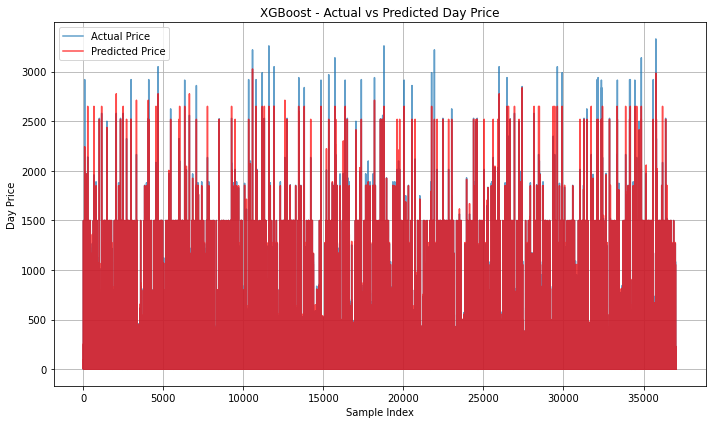

In [ ]:
#mse
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R²
r2 = r2_score(y_test, y_pred)

#mae
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")
print(f"XGBoost R2_score: {r2:.4f}")
print(f"XGBoost MAE: {mae:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price', alpha=0.7)
plt.plot(y_pred, label='Predicted Price', alpha=0.7, color='red')
plt.title('XGBoost - Actual vs Predicted Day Price')
plt.xlabel('Sample Index')
plt.ylabel('Day Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The XGBoost model demonstrates excellent performance. The remarkably high R-squared of 0.9934 signifies that this model is highly effective at learning and predicting the variance in the target variable.

The R-squared clearly indicates that the XGBoost model provides a fundamentally superior and reliable fit, successfully capturing the complex relationships within the data.

In [ ]:
os.makedirs("saved_xgb_models", exist_ok = True)

feature_cols = [
    'Day Price_lag1', 'Day Price_lag2', 'Day Price_lag3',
    'RSI_lag1', 'RSI_lag2', 'RSI_lag3',
    'EMA_10_lag1', 'EMA_10_lag2', 'EMA_10_lag3'
]

stocks = nse_data['Code'].unique()

# Store metrics
mae_list = []
rmse_list = []
r2_list = []

for stock in stocks:
    stock_df = nse_data[nse_data['Code'] == stock].copy()

    if stock_df[feature_cols + ['Day Price']].isnull().any().any() or len(stock_df) < 30:
        print(f"Skipping {stock} due to insufficient or missing data.")
        continue

    X = stock_df[feature_cols]
    y = stock_df['Day Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = xgb.XGBRegressor(
        objective = 'reg:squarederror',
        n_estimators = 100,
        learning_rate = 0.1,
        max_depth = 6,
        random_state = 42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"{stock}: MAE = {mae:.3f}, RMSE = {rmse:.3f}, R² = {r2:.3f}")

    # Save model
    model_path = f"saved_xgb_models/xgb_model_{stock}.pkl"
    joblib.dump(model, model_path)

# Aggregate metrics
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

print("\n===== Average Metrics Across Stocks =====")
print(f"Average MAE:  {avg_mae:.3f}")
print(f"Average RMSE: {avg_rmse:.3f}")
print(f"Average R²:   {avg_r2:.3f}")

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ABSA: MAE = 0.117, RMSE = 0.216, R² = 0.994


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARM: MAE = 0.442, RMSE = 0.898, R² = 0.999


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BAMB: MAE = 1.538, RMSE = 2.598, R² = 0.999


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BAT: MAE = 7.863, RMSE = 13.861, R² = 0.994


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BKG: MAE = 0.526, RMSE = 0.920, R² = 0.978


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BOC: MAE = 1.675, RMSE = 2.904, R² = 0.988


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BRIT: MAE = 0.215, RMSE = 0.405, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CABL: MAE = 0.121, RMSE = 0.228, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CARB: MAE = 0.692, RMSE = 3.890, R² = 0.990


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CGEN: MAE = 0.673, RMSE = 1.200, R² = 0.987


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CIC: MAE = 0.073, RMSE = 0.122, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


COOP: MAE = 0.170, RMSE = 0.299, R² = 0.990


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CRWN: MAE = 1.202, RMSE = 2.151, R² = 0.994


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CTUM: MAE = 0.467, RMSE = 0.753, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DCON: MAE = 0.034, RMSE = 0.101, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DTK: MAE = 1.635, RMSE = 3.282, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EABL: MAE = 2.573, RMSE = 3.974, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EGAD: MAE = 0.445, RMSE = 0.783, R² = 0.991


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EQTY: MAE = 0.506, RMSE = 0.758, R² = 0.987


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EVRD: MAE = 0.058, RMSE = 0.121, R² = 0.987


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


FTGH: MAE = 0.098, RMSE = 0.165, R² = 0.995


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GLD: MAE = 9.233, RMSE = 29.817, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


HAFR: MAE = 0.042, RMSE = 0.136, R² = 0.994
HBE: MAE = 0.000, RMSE = 0.000, R² = 0.000


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


HFCK: MAE = 0.258, RMSE = 0.551, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


IMH: MAE = 1.228, RMSE = 2.830, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


JUB: MAE = 4.992, RMSE = 8.243, R² = 0.995


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KAPC: MAE = 2.002, RMSE = 4.055, R² = 0.994


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KCB: MAE = 0.460, RMSE = 0.668, R² = 0.995


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KEGN: MAE = 0.106, RMSE = 0.190, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KNRE: MAE = 0.164, RMSE = 0.310, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KPLC: MAE = 0.108, RMSE = 0.208, R² = 0.999


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KPLC-P4: MAE = 0.002, RMSE = 0.013, R² = 1.000


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KPLC-P7: MAE = 0.000, RMSE = 0.001, R² = 1.000


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KQ: MAE = 0.096, RMSE = 0.186, R² = 0.997


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KUKZ: MAE = 4.288, RMSE = 8.217, R² = 0.994


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KURV: MAE = 0.000, RMSE = 0.000, R² = 1.000
LAPR: MAE = 0.000, RMSE = 0.000, R² = 1.000


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LBTY: MAE = 0.272, RMSE = 0.404, R² = 0.995


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LIMT: MAE = 3.588, RMSE = 13.762, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LKL: MAE = 0.173, RMSE = 0.415, R² = 0.991


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSC: MAE = 0.027, RMSE = 0.051, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NBK: MAE = 0.214, RMSE = 0.407, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NBV: MAE = 0.113, RMSE = 0.276, R² = 0.983


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NCBA: MAE = 0.613, RMSE = 1.060, R² = 0.994


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NMG: MAE = 1.607, RMSE = 3.488, R² = 0.999


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NSE: MAE = 0.229, RMSE = 0.388, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


OCH: MAE = 0.098, RMSE = 0.156, R² = 0.983


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ORCH: MAE = 0.246, RMSE = 1.069, R² = 0.999


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


PORT: MAE = 0.699, RMSE = 1.360, R² = 0.997


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SASN: MAE = 0.482, RMSE = 0.665, R² = 0.973


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SBIC: MAE = 1.538, RMSE = 2.258, R² = 0.986


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SCAN: MAE = 0.477, RMSE = 0.978, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SCBK: MAE = 2.018, RMSE = 3.088, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SCOM: MAE = 0.270, RMSE = 0.379, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SGL: MAE = 0.551, RMSE = 0.838, R² = 0.993


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SLAM: MAE = 0.940, RMSE = 2.349, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SMER: MAE = 0.094, RMSE = 0.137, R² = 0.991


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TCL: MAE = 0.205, RMSE = 0.410, R² = 0.998


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TOTL: MAE = 0.474, RMSE = 0.675, R² = 0.976


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TPSE: MAE = 0.496, RMSE = 0.721, R² = 0.996


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


UCHM: MAE = 0.110, RMSE = 0.223, R² = 0.999


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


UMME: MAE = 0.255, RMSE = 0.415, R² = 0.992


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


UNGA: MAE = 0.654, RMSE = 1.139, R² = 0.984


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


WTK: MAE = 3.475, RMSE = 6.219, R² = 0.990
XPRS: MAE = 0.105, RMSE = 0.164, R² = 0.982

===== Average Metrics Across Stocks =====
Average MAE:  0.972
Average RMSE: 2.099
Average R²:   0.979


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 5.3 LSTM (LONG SHORT TERM MEMORY)


Training model for stock ABSA...
Epoch 1/5
75/75 [==============================] - 6s 24ms/step - loss: 0.0176 - val_loss: 0.0015
Epoch 2/5
75/75 [==============================] - 1s 15ms/step - loss: 9.7429e-04 - val_loss: 0.0011
Epoch 3/5
75/75 [==============================] - 1s 16ms/step - loss: 8.5615e-04 - val_loss: 5.0404e-04
Epoch 4/5
75/75 [==============================] - 1s 15ms/step - loss: 8.0220e-04 - val_loss: 4.5109e-04
Epoch 5/5
19/19 [==============================] - 1s 7ms/step
Evaluation metrics for ABSA:
  MAE : 0.1732
  MSE : 0.0556
  RMSE: 0.2357
  R²  : 0.9690

Training model for stock ARM...
Epoch 1/5
75/75 [==============================] - 4s 21ms/step - loss: 0.0138 - val_loss: 1.8360e-06
Epoch 2/5
75/75 [==============================] - 1s 17ms/step - loss: 5.0038e-04 - val_loss: 3.3535e-06
Epoch 3/5
75/75 [==============================] - 1s 17ms/step - loss: 4.8896e-04 - val_loss: 3.3618e-08
Epoch 4/5
75/75 [==============================] - 1s 1

19/19 [==============================] - 0s 8ms/step
Evaluation metrics for COOP:
  MAE : 0.2879
  MSE : 0.1332
  RMSE: 0.3650
  R²  : 0.8541

Training model for stock CRWN...
Epoch 1/5
75/75 [==============================] - 4s 20ms/step - loss: 0.0074 - val_loss: 0.0012
Epoch 2/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 5.2868e-04
Epoch 3/5
75/75 [==============================] - 1s 14ms/step - loss: 9.8981e-04 - val_loss: 7.8452e-04
Epoch 4/5
75/75 [==============================] - 1s 15ms/step - loss: 8.6580e-04 - val_loss: 5.7431e-04
Epoch 5/5
19/19 [==============================] - 0s 6ms/step
Evaluation metrics for CRWN:
  MAE : 2.9608
  MSE : 17.3300
  RMSE: 4.1629
  R²  : -0.2864

Training model for stock CTUM...
Epoch 1/5
75/75 [==============================] - 4s 20ms/step - loss: 0.0194 - val_loss: 0.0012
Epoch 2/5
75/75 [==============================] - 1s 15ms/step - loss: 5.1827e-04 - val_loss: 6.1871e-05
Epoch 3/5
75/75 [===

19/19 [==============================] - 0s 20ms/step - loss: 1.8925e-08 - val_loss: 2.6572e-09
Epoch 5/5
5/5 [==============================] - 0s 8ms/step
Evaluation metrics for HBE:
  MAE : 0.0000
  MSE : 0.0000
  RMSE: 0.0000
  R²  : 0.0000

Training model for stock HFCK...
Epoch 1/5
75/75 [==============================] - 4s 20ms/step - loss: 0.0069 - val_loss: 0.0021
Epoch 2/5
75/75 [==============================] - 1s 14ms/step - loss: 6.0537e-04 - val_loss: 0.0012
Epoch 3/5
75/75 [==============================] - 1s 16ms/step - loss: 5.3239e-04 - val_loss: 0.0011
Epoch 4/5
75/75 [==============================] - 1s 16ms/step - loss: 4.5775e-04 - val_loss: 6.4387e-04
Epoch 5/5
19/19 [==============================] - 0s 6ms/step
Evaluation metrics for HFCK:
  MAE : 0.4943
  MSE : 0.3611
  RMSE: 0.6009
  R²  : -0.3327

Training model for stock IMH...
Epoch 1/5
72/72 [==============================] - 4s 20ms/step - loss: 0.0152 - val_loss: 4.9268e-04
Epoch 2/5
72/72 [========

Epoch 3/5
75/75 [==============================] - 1s 15ms/step - loss: 7.9148e-04 - val_loss: 0.0023
Epoch 4/5
75/75 [==============================] - 1s 14ms/step - loss: 6.6401e-04 - val_loss: 0.0021
Epoch 5/5
19/19 [==============================] - 0s 6ms/step
Evaluation metrics for KUKZ:
  MAE : 9.1800
  MSE : 228.6415
  RMSE: 15.1209
  R²  : 0.7837

Training model for stock KURV...
Epoch 1/5
63/63 [==============================] - 4s 21ms/step - loss: 3.5133e-06 - val_loss: 6.0234e-08
Epoch 2/5
63/63 [==============================] - 1s 15ms/step - loss: 3.0933e-07 - val_loss: 4.0231e-09
Epoch 3/5
63/63 [==============================] - 1s 15ms/step - loss: 1.8558e-07 - val_loss: 3.9267e-10
Epoch 4/5
63/63 [==============================] - 1s 14ms/step - loss: 1.0193e-07 - val_loss: 3.0782e-11
Epoch 5/5
16/16 [==============================] - 0s 6ms/step
Evaluation metrics for KURV:
  MAE : 0.0000
  MSE : 0.0000
  RMSE: 0.0000
  R²  : 1.0000

Training model for stock LAPR.


Training model for stock OCH...
Epoch 1/5
75/75 [==============================] - 4s 23ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 2/5
75/75 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 3/5
75/75 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 4/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 5/5
19/19 [==============================] - 0s 7ms/step
Evaluation metrics for OCH:
  MAE : 0.2538
  MSE : 0.1238
  RMSE: 0.3519
  R²  : 0.5928

Training model for stock ORCH...
Epoch 1/5
75/75 [==============================] - 4s 22ms/step - loss: 0.0099 - val_loss: 0.3224
Epoch 2/5
75/75 [==============================] - 1s 14ms/step - loss: 6.8040e-04 - val_loss: 0.7053
Epoch 3/5
75/75 [==============================] - 1s 15ms/step - loss: 4.3416e-04 - val_loss: 0.4780
Epoch 4/5
75/75 [==============================] - 1s 14ms/step - loss: 3.0176e-04 - val


Training model for stock TOTL...
Epoch 1/5
75/75 [==============================] - 4s 20ms/step - loss: 0.0105 - val_loss: 0.0022
Epoch 2/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 3/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 4/5
75/75 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 5/5
19/19 [==============================] - 0s 6ms/step
Evaluation metrics for TOTL:
  MAE : 0.8216
  MSE : 1.0124
  RMSE: 1.0062
  R²  : 0.8202

Training model for stock TPSE...
Epoch 1/5
75/75 [==============================] - 4s 22ms/step - loss: 0.0093 - val_loss: 0.0013
Epoch 2/5
75/75 [==============================] - 1s 15ms/step - loss: 5.7137e-04 - val_loss: 5.6546e-04
Epoch 3/5
75/75 [==============================] - 1s 14ms/step - loss: 4.9079e-04 - val_loss: 3.9820e-04
Epoch 4/5
75/75 [==============================] - 1s 15ms/step - loss: 4.4504

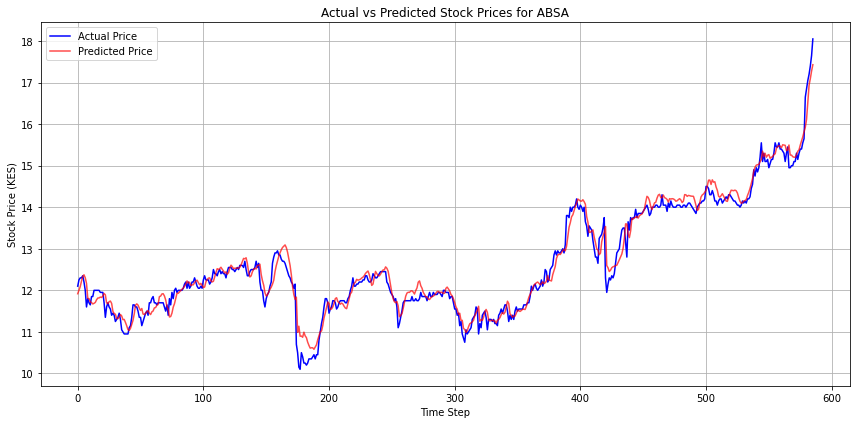

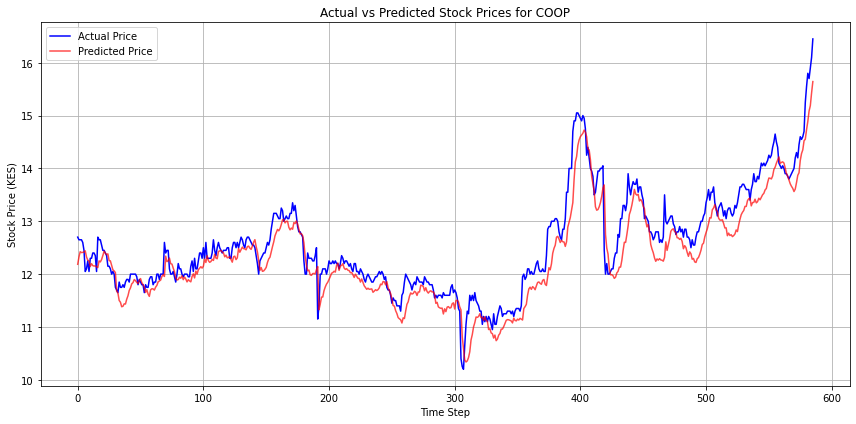

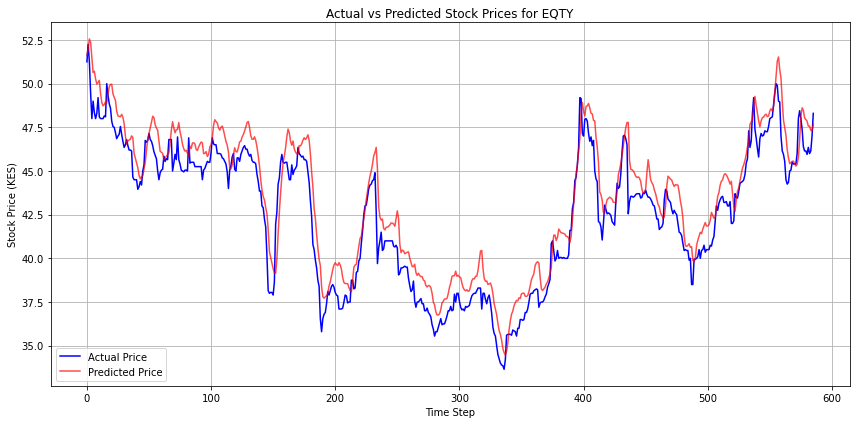

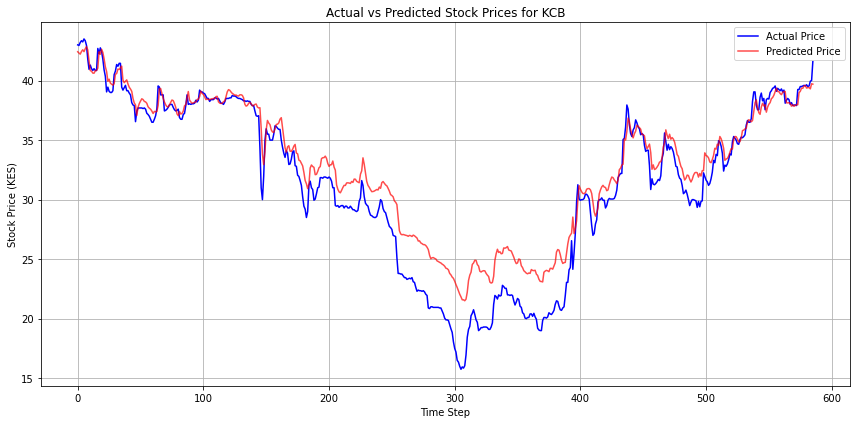

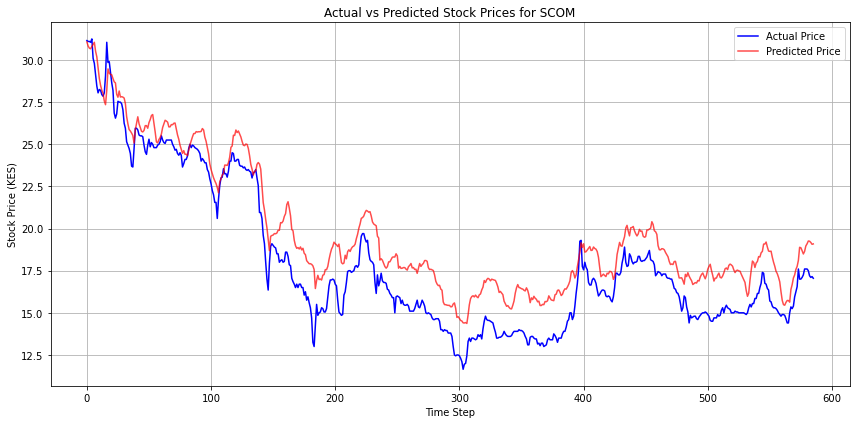

In [ ]:
# Sequence creation function
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, :-1])  # features
        y.append(data[i, -1])               # target
    return np.array(X), np.array(y)

stocks_to_plot = ['ABSA', 'SCOM', 'KCB', 'EQTY', 'COOP']
plot_data = {}
r2_scores = {}

# Lists to collect metrics
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

stock_codes = nse_data['Code'].unique()

# Train a model for each stock code
for stock_code in stock_codes:
    stock_data = nse_data[nse_data['Code'] == stock_code]

    # Define target and features
    target_col = 'Day Price'
    features = stock_data.drop(columns=['index', 'Date', 'Code', 'Name', 'Sector', 'Code_enc', target_col])
    target = stock_data[[target_col]]

    # Train-test split (before scaling)
    split = int(0.8 * len(stock_data))
    X_train_raw = features.iloc[:split]
    X_test_raw = features.iloc[split:]
    y_train_raw = target.iloc[:split]
    y_test_raw = target.iloc[split:]

    # Scaling
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    X_train_scaled = feature_scaler.fit_transform(X_train_raw)
    X_test_scaled = feature_scaler.transform(X_test_raw)

    y_train_scaled = target_scaler.fit_transform(y_train_raw)
    y_test_scaled = target_scaler.transform(y_test_raw)

    # Combine and create sequences
    train_combined = np.hstack([X_train_scaled, y_train_scaled])
    test_combined = np.hstack([X_test_scaled, y_test_scaled])

    n_steps = 10
    X_train_seq, y_train_seq = create_sequences(train_combined, n_steps)
    X_test_seq, y_test_seq = create_sequences(test_combined, n_steps)

    # LSTM model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(n_steps, X_train_seq.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Training
    print(f"\nTraining model for stock {stock_code}...")
    model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test_seq))

    # Prediction
    y_pred_scaled = model.predict(X_test_seq)
    y_pred = target_scaler.inverse_transform(y_pred_scaled)
    y_true = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    r2_scores[stock_code] = r2

    # Collect for final averages
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"Evaluation metrics for {stock_code}:")
    print(f"  MAE : {mae:.4f}")
    print(f"  MSE : {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²  : {r2:.4f}")

    if stock_code in stocks_to_plot:
        plot_data[stock_code] = (y_true.flatten(), y_pred.flatten())

# Final average metrics across all stocks
print("\n--- Final Average Evaluation Metrics Across All Stocks ---")
print(f"Average MAE : {np.mean(mae_list):.4f}")
print(f"Average MSE : {np.mean(mse_list):.4f}")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average R²  : {np.mean(r2_list):.4f}")

# Plotting for selected stocks
for stock_code, (y_true, y_pred) in plot_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual Price', color='blue')
    plt.plot(y_pred, label='Predicted Price', color='red', alpha=0.7)
    plt.title(f'Actual vs Predicted Stock Prices for {stock_code}')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price (KES)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The evaluation of the LSTM model across multiple stocks revealed moderately acceptable error metrics, with an average MAE of 3.42 and RMSE of 6.33, indicating the model can predict stock prices with reasonable accuracy in terms of absolute error.

Although the r squared performed poorly it was affected by individual stock that had no change.

This code is designed to:

Create individual price prediction models for multiple stocks

Handle the entire pipeline from data preparation to price prediction

Use time-series patterns (via LSTM) to predict future stock prices

## 6. Model evaluation.

--- Model Performance Metrics ---
           MAE      MSE    RMSE
Model                          
SARIMA  1.2714   2.5053  1.5828
XGBoost 2.5545 490.1336 22.1390
LSTM    3.4160 492.5926 22.1944

--- Visualizing Model Comparison ---


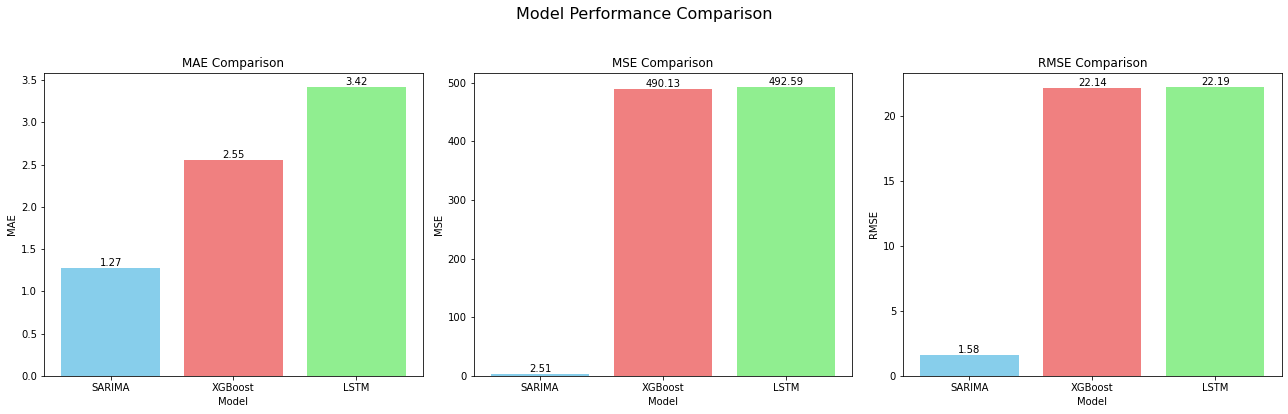


Comparison complete. Lower values for MAE, MSE, and RMSE generally indicate better model performance.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# SARIMA Metrics
sarima_mae = 1.2714
sarima_mse = 2.5053
sarima_rmse = np.sqrt(sarima_mse)

# XGBoost Metrics
xgboost_mae = 2.5545
xgboost_mse = 490.1336
xgboost_rmse = np.sqrt(xgboost_mse)

# LSTM Metrics
lstm_mae = 3.4160
lstm_mse = 492.5926
lstm_rmse = np.sqrt(lstm_mse)

# --- Create a DataFrame for Comparison ---
print("--- Model Performance Metrics ---")

# Create a dictionary to hold the metrics
comparison_data = {
    'Model': ['SARIMA', 'XGBoost', 'LSTM'],
    'MAE': [sarima_mae, xgboost_mae, lstm_mae],
    'MSE': [sarima_mse, xgboost_mse, lstm_mse],
    'RMSE': [sarima_rmse, xgboost_rmse, lstm_rmse]
}

# Create a pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model')

# Display the comparison table
# Format the numbers for better readability
print(comparison_df.to_string(float_format='{:.4f}'.format))

# --- Visualize the Comparison ---
print("\n--- Visualizing Model Comparison ---")

# Plotting the metrics using a bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics_to_plot = ['MAE', 'MSE', 'RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, metric in enumerate(metrics_to_plot):
    # Get data for the current metric
    metric_values = comparison_df[metric]
    models = metric_values.index

    # Create bar chart
    bars = axes[i].bar(models, metric_values, color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=0)

    # Add data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nComparison complete. Lower values for MAE, MSE, and RMSE generally indicate better model performance.")


The bar charts illustrate the performance comparison of SARIMA, XGBoost, and LSTM models using three error metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Among the three, SARIMA delivers the most accurate results, achieving the lowest error values with an MAE of 1.27, MSE of 2.51, and RMSE of 1.58. In contrast, the XGBoost and LSTM models show notably higher errors. XGBoost records an MAE of 2.55, MSE of 490.13, and RMSE of 22.14, while LSTM performs the poorest, with the highest MAE of 3.42, MSE of 492.59, and RMSE of 22.19.

## 7. Conclusions and recommendations.

### 7.1 Conclusion

## 7.2 Recommendations.
Focus on high-volume stocks, as they typically provide better liquidity, allowing traders to enter and exit positions with minimal price slippage. High trading volume also indicates strong investor interest and activity, which often leads to more consistent and significant price movements. These characteristics make high-volume stocks particularly attractive for short-term trading strategies, where timely execution and frequent price action are essential for capturing quick gains.

Consider allocating a larger share of liquidity-sensitive investments to the Telecommunication and Banking sectors, as these typically exhibit higher trading volumes and market activity. This enhanced liquidity facilitates easier entry and exit from positions, reducing the likelihood of price slippage and potentially lowering transaction costs. Additionally, these sectors often include well-established companies with steady investor interest, making them more stable and predictable for managing large or frequently adjusted positions. This makes them ideal for strategies that require flexibility and quick response to market conditions.

Diversify your portfolio by including both high-volume sectors and emerging industries to achieve a balanced risk-return profile. High-volume sectors, such as Finance and Telecommunications, offer stability, liquidity, and consistent performance due to their established market presence and strong investor participation. In contrast, emerging sectors—like Technology, Renewable Energy, or Fintech—may exhibit higher volatility but present significant growth potential as they innovate and expand. This diversification strategy helps cushion against market downturns in any single sector while positioning the portfolio to benefit from future growth opportunities in rapidly evolving industries.

## 7.3 Next steps


1. Enhance Feature Engineering and Integration by 

Adding technical indicators like Bollinger Bands to enrich model input.

Incorporating volume-based metrics to reflect market liquidity.

Integrating fundamental and macroeconomic data like earnings reports and  sector performance.


2. Expanding Data Utilization and Continuous Retraining by

Defining an optimal historical data window for modeling.

Automating data ingestion and model retraining through pipelines.

Exploring  high-frequency data (hourly/intraday) for improved short-term forecasting.


3. Improving Model Evaluation and Performance Monitoring by 

Using advanced metrics like Sharpe Ratio (risk-adjusted return),Maximum Drawdown (worst peak-to-trough loss) and Hit Rate (accuracy of directional predictions).

Implementing drift detection to identify and react to market regime changes.


